In [1]:
### Script calculate and analyze enriched pathways on the estimated MOFA models (based on the MOFA method comparing mean differences in factor values)
# Pathway databases: KEGG, REACTOME

#############################################
# Prerequisites - Load Libraries

In [2]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'”


[1] "/home/icb/corinna.losert/miniconda3/envs/stark_stemi_R_Env_4_1//lib/R/library"



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
   

In [3]:
source('MS4_Plot_Config.r')

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


###############################################
# Preqrequisites Configurations & General Parameters

In [4]:
data_path = '../data/current'

In [5]:
result_path = '../results/current'

In [6]:
data_path

[1] "../data/current"

In [7]:
### Which MOFA model to load

In [8]:
weight_views = FALSE

In [9]:
### Version of the pre-processed data to load

In [10]:
name = 'V_FINAL_INTEGRATED'

# Functions

In [11]:
### Function to run enrichment Test

run_enrichment_pathway =function(model, # MOFA Model
                         views = views,  # dimensions for which to run
                         factor_set,  # list of factors for which to run the enrichment
                         use_statistic,  # which statistic to use
                         feature_set, # Pathway Feature Set mapping
                         min_size, # Min size of genes within a pathway
                         use_test, # test used for calculating p-value
                         p_val_cutoff, # p-value cutoff used
                         enrichment_result_p_val, # dataset for saving results
                         enrichment_result_p_val_adjusted # dataset for saving result
                         ){
    
    set.seed(1)

    for(i in  views){

        ### All

        enrichment.parametric = run_enrichment(model,
          view = i , factors = factor_set,
          set.statistic = c(use_statistic),
          feature.sets = feature_set,
          min.size = min_size,
          sign = "all",   # alternatives: positive, negative, all
          statistical.test =  use_test, # alternatives: "parametric", "cor.adj.parametric", "permutation".
          alpha = p_val_cutoff # defines the p-value cutoff for significant pathways
        )

        result_data_adj = enrichment.parametric$pval.adj
        result_data = enrichment.parametric$pval

        result_data_adj = as.data.frame(result_data_adj)
        result_data_adj$pathway = rownames(result_data_adj)

        result_data = as.data.frame(result_data)
        result_data$pathway = rownames(result_data)


        result_data_adj = melt(as.data.frame(result_data_adj))
        result_data = melt(as.data.frame(result_data))

        result_data_adj$view = i
        result_data_adj$enrichment = 'all'

        result_data$view = i
        result_data$enrichment = 'all'

        enrichment_result_p_val = rbind(enrichment_result_p_val, result_data)
        enrichment_result_p_val_adjusted = rbind(enrichment_result_p_val_adjusted, result_data_adj)


        ### Negative

        enrichment.parametric = run_enrichment(model,
          view = i , factors =factor_set,
          set.statistic = c(use_statistic),
          feature.sets = feature_set,
          min.size = min_size,
          sign = "negative",   # alternatives: positive, negative, all
          statistical.test = use_test,
          alpha = p_val_cutoff # defines the p-value cutoff for significant pathways
        )

        result_data_adj = enrichment.parametric$pval.adj
        result_data = enrichment.parametric$pval

        result_data_adj = as.data.frame(result_data_adj)
        result_data_adj$pathway = rownames(result_data_adj)

        result_data = as.data.frame(result_data)
        result_data$pathway = rownames(result_data)


        result_data_adj = melt(as.data.frame(result_data_adj))
        result_data = melt(as.data.frame(result_data))

        result_data_adj$view = i
        result_data_adj$enrichment = 'negative'

        result_data$view = i
        result_data$enrichment = 'negative'

        enrichment_result_p_val = rbind(enrichment_result_p_val, result_data)
        enrichment_result_p_val_adjusted = rbind(enrichment_result_p_val_adjusted, result_data_adj)


        ### Positive

        enrichment.parametric = run_enrichment(model,
          view = i , factors =factor_set,
          set.statistic = c(use_statistic),
          feature.sets = feature_set,
          min.size = min_size,
          sign = "positive",   # alternatives: positive, negative, all
          statistical.test =  use_test,
          alpha = p_val_cutoff  # defines the p-value cutoff for significant pathways
        )

        result_data_adj = enrichment.parametric$pval.adj
        result_data = enrichment.parametric$pval

        result_data_adj = as.data.frame(result_data_adj)
        result_data_adj$pathway = rownames(result_data_adj)

        result_data = as.data.frame(result_data)
        result_data$pathway = rownames(result_data)


        result_data_adj = melt(as.data.frame(result_data_adj))
        result_data = melt(as.data.frame(result_data))

        result_data_adj$view = i
        result_data_adj$enrichment = 'positive'

        result_data$view = i
        result_data$enrichment = 'positive'

        enrichment_result_p_val = rbind(enrichment_result_p_val, result_data)
        enrichment_result_p_val_adjusted = rbind(enrichment_result_p_val_adjusted, result_data_adj)



        }
    
    ### correct for multiple testing
    enrichment_result_p_val_adjusted$value = enrichment_result_p_val_adjusted$value * length(unique(enrichment_result_p_val_adjusted$view))
    
    return(enrichment_result_p_val_adjusted)
}
    

# Load Data 

## Prepared combined expression data (MOFA Input)

In [12]:
path = paste0(result_path, '/E-Analysis/Combined_Data_',name,'.csv')
data_long = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-03 14:26:41 CET"


In [13]:
data_long$X = NULL

In [14]:
nrow(data_long)

[1] 1700096

In [15]:
nrow(unique(data_long[,c('sample_id', 'type', 'variable')]))

[1] 1700096

In [16]:
unique(data_long$type[data_long$sample_id == 'm.20.1'])

character(0)

## Sample Data

In [17]:
sample_data = read.csv(paste0(result_path, '/00_Data_Overview/Merged_Sample_Meta_Data.csv'))

In [18]:
sample_data$CK = log2(sample_data$CK+1)

In [19]:
sample_data$Troponin = log2(sample_data$Troponin+1)

In [20]:
sample_data$CK_MB = log2(as.numeric(sample_data$CK_MB)+1)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [21]:
sample_data$CRP =  log2(as.numeric(sample_data$CRP)+1)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


## Pathway genes (from KEGG + Reactome)

### REACTOME

In [22]:
### Load saved data about pathways - which pathways belong to immune system (extracted from REACTOME)

In [23]:
immune_system_pathways = read.csv(paste0(data_path, '/preprocessed-data/meta-data/Immune_System_Pathways.csv'))

In [24]:
pathway_hierarchy = read.csv(paste0(data_path, '/preprocessed-data/meta-data/Reactome_Pathway_Hierarchy.csv'))

In [25]:
colnames(immune_system_pathways) = c('index', 'pathway')

In [26]:
head(immune_system_pathways,2)

,index,pathway
,<int>,<chr>
1,1,R-HSA-168256
2,2,R-HSA-1280215


In [27]:
head(pathway_hierarchy,2)

,R.BTA.109581....R.BTA.109606,X,X.1
,<chr>,<lgl>,<lgl>
1,R-BTA-109581 R-BTA-169911,NA,NA
2,R-BTA-109581 R-BTA-5357769,NA,NA


In [28]:
### Get all REACTOME pathways

In [29]:
pathway_names = as.list(reactomePATHID2NAME )

In [30]:
pathway_names = do.call(rbind,pathway_names)

In [31]:
pathway_names = data.frame(pathway = rownames(pathway_names), name = pathway_names)

In [32]:
head(pathway_names,2)

,pathway,name
,<chr>,<chr>
R-BTA-73843,R-BTA-73843,1-diphosphate: 5-Phosphoribose
R-BTA-1971475,R-BTA-1971475,Bos taurus: A tetrasaccharide linker sequence is required for GAG synthesis


In [33]:
pathway_genes = as.list(reactomePATHID2EXTID)

In [34]:
pathway_genes = pathway_genes[!is.na(str_extract(names(pathway_genes), 'R-HSA-'))]

In [35]:
pathway_genes_all = pathway_genes

In [36]:
#head(pathway_genes_all,2)

In [37]:
### Decide on whether to filter only on immune system pathways

In [38]:
only_immune_pathways = FALSE

In [39]:
if(only_immune_pathways == TRUE){
    pathway_genes = pathway_genes[names(pathway_genes) %in% immune_system_pathways$pathway]
    }

In [40]:
length(pathway_genes)

[1] 2500

In [41]:
## Generate a data.frame that contains all pathways with their genes in long format

In [42]:
#head(pathway_genes)

In [43]:
pathway_genes_data = data.frame()

In [44]:
#pathway_genes[[1]]

In [45]:
for(i in names(pathway_genes)){
    data = data.frame(gene_id = pathway_genes[[i]], pathway = i)
    pathway_genes_data = rbind(pathway_genes_data, data)
    }

In [46]:
head(pathway_genes_data,2)

,gene_id,pathway
,<chr>,<chr>
1,1,R-HSA-109582
2,10019,R-HSA-109582


In [47]:
pathway_genes = pathway_genes_data

In [48]:
head(pathway_genes,2)

,gene_id,pathway
,<chr>,<chr>
1,1,R-HSA-109582
2,10019,R-HSA-109582


In [49]:
#genes = unique(pathway_genes)

In [50]:
#### Map Reactome gene IDs to SYMBOL
mapped_genes = bitr(pathway_genes$gene_id, fromType="ENTREZID", toType="SYMBOL", OrgDb = 'org.Hs.eg.db')

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(pathway_genes$gene_id, fromType = "ENTREZID", toType = "SYMBOL", :
“2.51% of input gene IDs are fail to map...”


In [51]:
head(mapped_genes,2)

,ENTREZID,SYMBOL
,<chr>,<chr>
1,1,A1BG
2,10019,SH2B3


In [52]:
pathway_genes = merge(pathway_genes, mapped_genes, by.x = 'gene_id', by.y = 'ENTREZID', all.x = TRUE)

In [53]:
pathway_genes = merge(pathway_genes, pathway_names, all.x = TRUE)

In [54]:
nrow(pathway_genes)

[1] 134911

In [55]:
head(pathway_genes,2)

,pathway,gene_id,SYMBOL,name
,<chr>,<chr>,<chr>,<chr>
1,R-HSA-1059683,7297,TYK2,Homo sapiens: Interleukin-6 signaling
2,R-HSA-1059683,3572,IL6ST,Homo sapiens: Interleukin-6 signaling


In [56]:
pathway_genes = unique(pathway_genes)

In [57]:
### Check out mapping failures

In [58]:
mapping = head(pathway_genes %>% group_by(pathway) %>% summarise(amount_mapping = sum(!is.na(SYMBOL)), amount_non_mapping = sum(is.na(SYMBOL)), amount_no_description =sum(is.na(name)) ))

In [59]:
head(mapping,2)

pathway,amount_mapping,amount_non_mapping,amount_no_description
<chr>,<int>,<int>,<int>
R-HSA-1059683,11,0,0
R-HSA-109581,180,2,0


In [60]:
sum(mapping$amount_no_description)   # all descriptions mappes

[1] 0

In [61]:
nrow(pathway_genes)

[1] 121536

In [62]:
### Calculate similarities of pathways and cluster them (used later for grouping in visualization)

In [63]:
cluster_data = merge(pathway_genes, immune_system_pathways, by.x = 'pathway', by.y = 'pathway')

In [64]:
#length(unique(cluster_data$pathway))

In [65]:
head(cluster_data,2)

,pathway,gene_id,SYMBOL,name,index
,<chr>,<chr>,<chr>,<chr>,<int>
1,R-HSA-1059683,9021,SOCS3,Homo sapiens: Interleukin-6 signaling,165
2,R-HSA-1059683,3572,IL6ST,Homo sapiens: Interleukin-6 signaling,165


In [66]:
cluster_data$value = 1   # each gene gets value of 1 --> pathways with similar genes are matched

In [67]:
cluster_data = cluster_data %>% dcast(pathway ~ gene_id, value.var = 'value')

In [68]:
head(cluster_data,2)

,pathway,1,10000,100049587,10006,10010,100131439,100132285,100133267,10018,⋯,996,9961,9966,997,9972,9976,9978,998,9987,999
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,R-HSA-1059683,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,R-HSA-1168372,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [69]:
## Calculate PCA to reduce feature space

In [70]:
cluster_data[is.na(cluster_data)] = 0 ## set missing genes to 0

In [71]:
rownames(cluster_data) = cluster_data$pathway
cluster_data$pathway = NULL

In [72]:
#head(cluster_data,2)

In [73]:
set.seed(1)
pca_result = prcomp(cluster_data)

In [74]:
head(pca_result$x,2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191
R-HSA-1059683,-1.693075,1.0868998,-0.5042435,0.7203045,-0.2261852,-0.2540561,0.5212171,-0.1159961,0.01536196,-0.1071698,⋯,3.538836e-16,-6.314393e-16,-6.800116e-16,6.643991e-16,1.268083e-15,2.810252e-16,1.387779e-16,7.823603e-16,1.804112e-16,-8.326673e-16
R-HSA-1168372,1.376111,-0.0784901,4.1759077,-1.8010895,4.8589560,0.3186951,-0.9369835,-0.1564736,-0.68501231,0.3219760,⋯,-5.845151e-15,-9.818535e-16,-2.015749e-15,1.979753e-15,1.942023e-15,1.630640e-15,1.193490e-15,9.471590e-16,1.992547e-15,-2.709638e-15


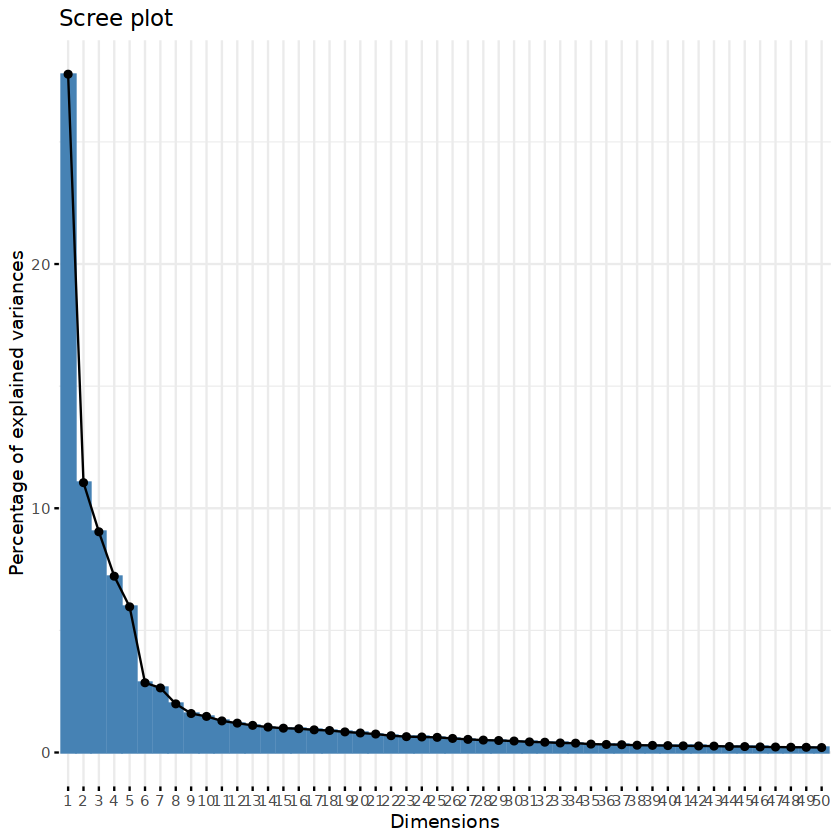

In [75]:
fviz_eig(pca_result, ncp = 50)

In [76]:
set.seed(1)
cluster_result = kmeans(x = pca_result$x[,1:10], centers = 15)

In [77]:
head(cluster_result$cluster)

R-HSA-1059683 R-HSA-1168372 R-HSA-1169091 R-HSA-1169092 R-HSA-1169408 
           12            10            10             9             4 
R-HSA-1169410 
            4

In [78]:
pathways_clustered = data.frame(pathway = names(cluster_result$cluster), cluster = cluster_result$cluster)

In [79]:
pathway_names = unique(pathway_genes[,c('pathway', 'name')])

In [80]:
pathways_clustered = merge(pathways_clustered, pathway_names)

In [81]:
head(pathways_clustered,2)

,pathway,cluster,name
,<chr>,<int>,<chr>
1,R-HSA-1059683,12,Homo sapiens: Interleukin-6 signaling
2,R-HSA-1168372,10,Homo sapiens: Downstream signaling events of B Cell Receptor (BCR)


In [82]:
### Amount of pathways per cluster
pathways_clustered %>% group_by(cluster) %>% count()

cluster,n
<int>,<int>
1,17
2,7
3,2
4,5
5,1
6,5
7,2
8,3
9,56


### KEGG

In [83]:
### Read in selected kegg categories and pathways (immune and signaling pathways)

In [84]:
kegg_pathways = read.csv(paste0(data_path, '/preprocessed-data/meta-data/Interesting_KEGG_pathways_categorized.csv'))

In [85]:
kegg_pathways$ID = paste0('hsa0', kegg_pathways$ID)

In [86]:
### Get KEGG pathway data (all pathways from database)

In [87]:
kegg_pathways_data  = download_KEGG(species = 'hsa', keggType = "KEGG", keyType = "kegg")

Reading KEGG annotation online:


Reading KEGG annotation online:




In [88]:
#str(kegg_pathways_data)

In [89]:
## extract genes and pathway names

In [90]:
kegg_pathways_genes = kegg_pathways_data$KEGGPATHID2EXTID

In [91]:
colnames(kegg_pathways_genes) = c('pathway', 'gene_id')

In [92]:
kegg_pathway_names = kegg_pathways_data$KEGGPATHID2NAME

In [93]:
colnames(kegg_pathway_names) = c('pathway', 'name')

In [94]:
## generate a dataframe containing all pathways with their names

In [95]:
kegg_pathways_data = merge(kegg_pathways_genes, kegg_pathway_names)

In [96]:
###

# Load MOFA Model

In [97]:
model_name = paste0("MOFA_MODEL", name, '-', weight_views, '.hdf5')

In [98]:
model_name


[1] "MOFA_MODELV_FINAL_INTEGRATED-FALSE.hdf5"

In [99]:
outfile = file.path( paste0(result_path, '/E-Analysis/',  model_name) )

In [100]:
outfile
print(file.info(outfile)$mtime)

[1] "../results/current/E-Analysis/MOFA_MODELV_FINAL_INTEGRATED-FALSE.hdf5"

[1] "2024-01-03 14:33:17 CET"


In [101]:
model <- load_model(outfile)

Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 9, 12, 17 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


## Add metadata to model (from samples)

In [102]:
head(model@samples_metadata, n=3)

,group,sample
,<fct>,<chr>
1,group1,k1
2,group1,k10
3,group1,k11


In [103]:
nrow(sample_data)

[1] 149

In [104]:
length(unique(sample_data$sample_id))

[1] 146

In [105]:
model@samples_metadata = merge(model@samples_metadata, sample_data, by.x = 'sample', by.y = 'sample_id')

In [106]:
nrow(model@samples_metadata)

[1] 131

## Extract weight and factor data from model

### Extract data

In [107]:
#### Extract factors 

In [108]:
factors = get_factors(model, factors = "all")

In [109]:
factors = factors$group1

In [110]:
head(factors,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
k1,0.4811325,-0.2731317,1.4988169,-0.4135678,1.5052706,-0.92308998,-0.3904185,-0.1944797,0.16486799,-0.5581300,-0.05226468,1.3718758,0.1882956,-0.3082163,-0.47997108,0.3468897,0.5692611,0.416665730,-0.60204874,-0.03085489
k10,0.8920603,-0.7547770,0.3501023,-0.1524478,0.4074517,-0.04596939,0.6276925,-1.1656937,-0.05003504,-0.3380343,-0.01586095,-0.1020285,0.1199118,0.2096718,0.09246619,0.1335110,-0.0490552,-0.001722867,0.07838055,-0.03818913


In [111]:
## Extract weight data

In [112]:
weights = get_weights(model, views = "all", factors = "all")

In [113]:
weight_data = data.frame()

In [114]:
names(weights)

[1] "clinical_data"            "cytokine"                
 [3] "neutrophil"               "proteomics"              
 [5] "X0_TcellCD4"              "X1_TcellCD8"             
 [7] "X10_Bcell"                "X11_TcellCD4"            
 [9] "X12_MonocytesCD16_FCGR3A" "X13_Dendritic"           
[11] "X2_TcellCD4"              "X3_NK"                   
[13] "X4_MonocytesCD14"         "X5_TcellCD4"             
[15] "X6_MonocytesCD14"         "X7_MonocytesCD14"        
[17] "X8_Bcell"                 "X9_MonocytesCD16_FCGR3A"

In [115]:
for (i in names(weights)){
    data = data.frame(weights[[i]])
    data$type = i
    weight_data = rbind(weight_data,data)
    }

In [116]:
weight_data$variable_name = rownames(weight_data)

In [117]:
head(weight_data)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,type,variable_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CK,-0.134185974,0.4019222,-0.10107650,-0.002177566,-0.50936665,0.24179134,-0.036350975,0.05304519,0.0011574664,-0.0123071302,⋯,-0.160450518,-0.0014186183,0.15409447,0.003821864,-0.24205661,0.0040925822,-0.0005618720,-0.24239441,clinical_data,CK
CK_MB,-0.062226210,0.2731985,-0.20003621,-0.076098327,-0.14394453,0.04289833,-0.718185970,0.18658970,-0.0007753517,-0.0030743082,⋯,-0.610716171,0.0024994941,0.38644640,-0.001090137,-0.08311704,0.0095034985,-0.0003621744,0.20601583,clinical_data,CK_MB
CRP,-0.070745944,0.1436933,0.32511723,0.874486756,-0.62137315,-0.20316412,0.002131499,0.02329457,0.0041294886,0.0002250871,⋯,0.122925352,-0.0009936264,-0.75601971,-0.015343540,-0.09221061,-0.0051228455,0.0048858089,-0.40467127,clinical_data,CRP
Troponin,-0.127869080,0.3756499,0.14888873,0.324815756,-0.57842721,0.04581684,-0.032055388,0.31853530,0.0142770231,-0.0049741087,⋯,-0.140620253,0.0065908149,0.12885486,-0.004313343,-0.14217673,-0.0004995215,0.0042891005,-0.46873354,clinical_data,Troponin
BCA1__CXCL13,0.007978853,0.0244314,-0.01729291,-0.287106067,-0.06740164,-0.04226999,-0.034935911,0.02324887,-0.0958397941,-0.1544841783,⋯,0.661863941,0.5054456766,-0.05135095,0.039386175,-0.22319993,-0.0473087682,0.1148286132,-0.00669062,cytokine,BCA1__CXCL13
CTACK__CCL27,0.015216616,-0.1759984,0.02830920,-0.008525780,0.07248504,-0.05209972,-0.037116100,0.03559665,-0.2632141994,-0.0240123032,⋯,0.009363874,0.1033614366,-0.03065582,-0.062804961,0.03825064,-0.0388826053,0.1936810295,0.16105132,cytokine,CTACK__CCL27


### Merge factors and sample data

In [118]:
head(factors,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
k1,0.4811325,-0.2731317,1.4988169,-0.4135678,1.5052706,-0.92308998,-0.3904185,-0.1944797,0.16486799,-0.5581300,-0.05226468,1.3718758,0.1882956,-0.3082163,-0.47997108,0.3468897,0.5692611,0.416665730,-0.60204874,-0.03085489
k10,0.8920603,-0.7547770,0.3501023,-0.1524478,0.4074517,-0.04596939,0.6276925,-1.1656937,-0.05003504,-0.3380343,-0.01586095,-0.1020285,0.1199118,0.2096718,0.09246619,0.1335110,-0.0490552,-0.001722867,0.07838055,-0.03818913


In [119]:
nrow(factors)

[1] 128

In [120]:
nrow(sample_data)

[1] 149

In [121]:
length(unique(sample_data$sample_id))

[1] 146

In [122]:
factors_merge = data.frame(factors)

In [123]:
factors_merge$sample_id = rownames(factors_merge)

In [124]:
merged_data = merge(factors_merge, unique(sample_data[,c('sample_id', 'measurement')]), by.x = 'sample_id', by.y = 'sample_id')

In [125]:
length(unique(merged_data$sample_id))

[1] 128

In [126]:
nrow(merged_data)

[1] 128

# Pathway Enrichment Analysis MOFA Approach

## Parameters for enrichment calculation

In [127]:
## select factors for which to calculate enrichment

In [128]:
factors_list = list( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5')
#factors_list = list( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'Factor8', 'Factor9', 'Factor10', 'Factor11', 'Factor12', 'Factor13', 'Factor14', 'Factor15', 'Factor16', 'Factor17', 'Factor18', 'Factor19', 'Factor20')

In [129]:
names(factors_list) = c( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5')
#names(factors_list) = c( 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'Factor8', 'Factor9', 'Factor10', 'Factor11', 'Factor12', 'Factor13', 'Factor14', 'Factor15', 'Factor16', 'Factor17', 'Factor18', 'Factor19', 'Factor20')

In [130]:
## Based on coverage filter out pathways for which we have only a low amount of genes 
coverage_par = 0.2 # less than 20 % 

In [131]:
### Set the parameters for enrichment calculation

In [132]:
use_statistic = "rank.sum" # alternatives: mean.diff, rank.sum

In [133]:
use_test = 'parametric'  # alternatives: permutation, parametric, "cor.adj.parametric"

In [134]:
p_val_cutoff = 0.05
### for current results in Figures: 0.05

In [135]:
factor_set = 1:5

In [136]:
min_size = 5

## Prepare weight data of model & map gene-ids

In [137]:
## Recode names of views

In [138]:
weight_data$view = weight_data$type

In [139]:
weight_data$view = str_replace(weight_data$view, 'X0_TcellCD4', 'CD4+ T cells (Cluster 0)')
weight_data$view = str_replace(weight_data$view, 'clinical_data', 'Clinical')
weight_data$view = str_replace(weight_data$view, 'X1_TcellCD8', 'CD8+ T cells (Cluster 1)')
weight_data$view = str_replace(weight_data$view, 'X10_Bcell', 'B cells (Cluster 10)')
weight_data$view = str_replace(weight_data$view, 'X11_TcellCD4', 'CD4+ T cells (Cluster 11)')
weight_data$view = str_replace(weight_data$view, 'X12_MonocytesCD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 12)')
weight_data$view = str_replace(weight_data$view, 'X13_Dendritic',  'Dendritic cells (Cluster 13)')
weight_data$view = str_replace(weight_data$view, 'X2_TcellCD4', 'CD4+ T cells (Cluster 2)')
weight_data$view = str_replace(weight_data$view, 'X3_NK', 'NK cells (Cluster 3)')
weight_data$view = str_replace(weight_data$view, 'X4_MonocytesCD14', 'CD14(high) Monocytes (Cluster 4)')
weight_data$view = str_replace(weight_data$view, 'X5_TcellCD4', 'CD4+ T cells (Cluster 5)')
weight_data$view = str_replace(weight_data$view, 'X6_MonocytesCD14','CD14(high) Monocytes (Cluster 6)')
weight_data$view = str_replace(weight_data$view, 'X7_MonocytesCD14', 'CD14(high) Monocytes (Cluster 7)')
weight_data$view = str_replace(weight_data$view, 'X8_Bcell','B cells (Cluster 8)')
weight_data$view = str_replace(weight_data$view, 'X9_MonocytesCD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 9)')

weight_data$view  = str_replace(weight_data$view , 'clinical','Clinical')
weight_data$view  = str_replace(weight_data$view , 'cytokine','Cytokine')
weight_data$view  = str_replace(weight_data$view , 'neutrophil','Neutrophil')
weight_data$view  = str_replace(weight_data$view , 'proteomics','Proteomics')

In [140]:
unique(weight_data$view)

[1] "Clinical"                            "Cytokine"                           
 [3] "Neutrophil"                          "Proteomics"                         
 [5] "CD4+ T cells (Cluster 0)"            "CD8+ T cells (Cluster 1)"           
 [7] "B cells (Cluster 10)"                "CD4+ T cells (Cluster 11)"          
 [9] "FCGR3A(high) Monocytes (Cluster 12)" "Dendritic cells (Cluster 13)"       
[11] "CD4+ T cells (Cluster 2)"            "NK cells (Cluster 3)"               
[13] "CD14(high) Monocytes (Cluster 4)"    "CD4+ T cells (Cluster 5)"           
[15] "CD14(high) Monocytes (Cluster 6)"    "CD14(high) Monocytes (Cluster 7)"   
[17] "B cells (Cluster 8)"                 "FCGR3A(high) Monocytes (Cluster 9)"

In [141]:
nrow(weight_data)

[1] 13282

In [142]:
length(unique(weight_data$variable_name))

[1] 13282

In [143]:
### Adapt weight data to match genes from pathways

In [144]:
weight_data = weight_data[weight_data$type != 'clinical_data',]  # clinical data not matching to genes

In [145]:
weight_data$gene = NA

In [146]:
## Extract gene annotations for neutrophils, cytokine and protoemics

In [147]:
weight_data$gene[weight_data$type == 'cytokine'] = str_extract(weight_data$variable_name[weight_data$type == 'cytokine'] , '__.*')

In [148]:
weight_data$gene[weight_data$type == 'neutrophil'] = weight_data$variable_name[weight_data$type == 'neutrophil']

In [149]:
weight_data$gene[weight_data$type == 'proteomics'] = str_extract(weight_data$variable_name[weight_data$type == 'proteomics'] , '.*_')

In [150]:
weight_data$gene[!weight_data$type %in% c('cytokine','neutrophil','proteomics')] = str_extract(weight_data$variable_name[!weight_data$type %in% c('cytokine','neutrophil','proteomics')], '__.*')

In [151]:
weight_data$gene = str_replace(weight_data$gene, '__|_', '')

In [152]:
head(unique(weight_data$gene))

[1] "CXCL13" "CCL27"  "EGF"    "CXCL5"  "CCL11"  "CCL24"

In [153]:
### entries where gene could not be extracted --> two cytokine entries
weight_data[is.na(weight_data$gene),]

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,type,variable_name,view,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
PDGFAA,-0.0001193458,0.01176996,0.2799772,-0.1458656,0.07184872,-0.4163547,-0.0414234670,0.08340376,0.09799469,-0.03979457,⋯,0.01459581,-0.04054878,-0.001979418,-0.12107121,0.13589654,-0.1315031,cytokine,PDGFAA,Cytokine,NA
PDGFAB_BB,0.0068160447,0.04215479,0.3191974,-0.4459178,0.03400028,-0.4433293,-0.0002623475,-0.00121480,0.09122565,-0.07368290,⋯,0.02350395,-0.06732771,-0.001909318,0.02718558,0.06217928,-0.2018521,cytokine,PDGFAB_BB,Cytokine,NA


In [154]:
#### Transform to long format

In [155]:
feature_weights = weight_data

In [156]:
feature_weights_long = melt(feature_weights)

Using type, variable_name, view, gene as id variables



In [157]:
head(feature_weights_long,2)

,type,variable_name,view,gene,variable,value
,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,cytokine,BCA1__CXCL13,Cytokine,CXCL13,Factor1,0.007978853
2,cytokine,CTACK__CCL27,Cytokine,CCL27,Factor1,0.015216616


In [158]:
length(unique(feature_weights_long$gene))

[1] 3031

In [159]:
# Map to GENE-IDS to ENTREZIDs to match pathways

In [160]:
gene_mapping = bitr(str_replace_all(unique(feature_weights_long$gene), '\\.', '-'), fromType="SYMBOL", toType=c("ENTREZID"), OrgDb="org.Hs.eg.db")


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(str_replace_all(unique(feature_weights_long$gene), "\\.", :
“1.98% of input gene IDs are fail to map...”


In [161]:
### TRYING TO MAP PROTEOMICS SEPERATELY --> TBD!

In [162]:
length(unique(gene_mapping$SYMBOL))

[1] 2971

In [163]:
head(gene_mapping,2)

,SYMBOL,ENTREZID
,<chr>,<chr>
1,CXCL13,10563
2,CCL27,10850


In [164]:
### Not mapped genes
unique(str_replace_all(unique(feature_weights_long$gene), '\\.', '-'))[! str_replace_all(unique(feature_weights_long$gene), '\\.', '-') %in% gene_mapping$SYMBOL]

[1] NA            "TNFS10"      "APOBEC3AB"   "H3F3A"       "hCG2039566_"
 [6] "HIST1H1E"    "HIST1H4A"    "X"           "AES"         "ATP5MD"     
[11] "ATP5MPL"     "C6orf48"     "C9orf16"     "H1FX"        "H2AFV"      
[16] "H2AFZ"       "H3F3B"       "HIST1H4C"    "KIAA1551"    "RARRES3"    
[21] "SEPT6"       "SEPT7"       "SEPT9"       "AC044849-1"  "FAM49B"     
[26] "HIST1H1C"    "FAM49A"      "FAM96B"      "H2AFY"       "SMIM25"     
[31] "WARS"        "AC004687-1"  "AC007952-4"  "AC016831-5"  "AC020656-1" 
[36] "AC020916-1"  "AC245128-3"  "AC245297-3"  "ADSS"        "AL118516-1" 
[41] "C19orf24"    "C19orf70"    "C8orf59"     "COL4A3BP"    "ELMSAN1"    
[46] "FAM129A"     "FAM45A"      "H2AFJ"       "H2AFX"       "HIST2H2AC"  
[51] "LARS"        "MARCH1"      "MARCH6"      "MARCH7"      "MINOS1"     
[56] "POLR2J3-1"   "SEPT2"       "FAM198B"     "AC091271-1"  "AC245014-3"

In [165]:
## Add ENTREZID to feature_weights_long

In [166]:
nrow(feature_weights_long)

[1] 265560

In [167]:
feature_weights_long_mapped  = merge(feature_weights_long, gene_mapping, by.x = 'gene', by.y = 'SYMBOL', all.x = TRUE)

In [168]:
nrow(feature_weights_long_mapped )

[1] 265580

In [169]:
### Adjust cytokines for which no gene names are known 
feature_weights_long_mapped$gene[(feature_weights_long_mapped$type == 'cytokine') & is.na(feature_weights_long_mapped$gene)] = 'Not_mapped'

In [170]:
head(feature_weights_long_mapped,2)

,gene,type,variable_name,view,variable,value,ENTREZID
,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
1,A1BG,proteomics,A1BG_M0R009,Proteomics,Factor7,0.007422745,1
2,A1BG,proteomics,A1BG_P04217.2,Proteomics,Factor14,-0.062435242,1


## Adjust MOFA model feature names to fit gene names of feature set

In [171]:
## Make sure that MOFA model features are also on a gene level to map them

In [172]:
model_conc = model # save model with old feature names for later use in complete approach

In [173]:
head(with(feature_weights_long_mapped, gene[match(features_names(model)[[5]], variable_name)]))  # test the replacement

[1] "AAK1"   "ABRACL" "ACAP1"  "ACTB"   "ACTG1"  "ACTR2"

In [174]:
for(i in names(features_names(model))){   # need to find seperate solution for proteomics -- multiple proteins matching same gene [! names(features_names(model)) %in% c('proteomics')]
        features_names(model)[[i]] = with(feature_weights_long_mapped, gene[match(features_names(model)[[i]], variable_name)])
    }

In [175]:
i

[1] "X9_MonocytesCD16_FCGR3A"

In [176]:
head(features_names(model)[[i]])   # Test whether it worked

[1] "ABHD5"  "ABRACL" "ACAA1"  "ACAP2"  "ACTB"   "ACTG1"

## Generate Model with Weights across all Dimension

In [177]:
## needed for calculation of enrichment across all dimensions

In [178]:
#str(model)

In [179]:
#model_conc = model

In [180]:
head(model_conc@intercepts[['X0_TcellCD4']]$group1)

X0_T.cell.CD4__AAK1 X0_T.cell.CD4__ABRACL  X0_T.cell.CD4__ACAP1 
        -4.851055e-07          5.280713e-06          2.147269e-04 
  X0_T.cell.CD4__ACTB  X0_T.cell.CD4__ACTG1  X0_T.cell.CD4__ACTR2 
        -4.229244e-04          3.438394e-05         -6.380477e-06

In [181]:
model_conc@intercepts[['complete']]$group1 = c(#model@intercepts[['clinical_data']]$group1, 
                                           model_conc@intercepts[['cytokine']]$group1 , 
                                           model_conc@intercepts[['neutrophil']]$group1, 
                                           model_conc@intercepts[['proteomics']]$group1,
                                           model_conc@intercepts[['X0_TcellCD4']]$group1,
                                           model_conc@intercepts[['X1_TcellCD8']]$group1,
                                           model_conc@intercepts[['X10_Bcell']]$group1,
                                           model_conc@intercepts[['X11_TcellCD4']]$group1,
                                           model_conc@intercepts[['X12_MonocytesCD16_FCGR3A']]$group1,
                                           model_conc@intercepts[['X13_Dendritic']]$group1,
                                           model_conc@intercepts[['X2_TcellCD4']]$group1,
                                           model_conc@intercepts[['X3_NK']]$group1,
                                           model_conc@intercepts[['X4_MonocytesCD14']]$group1,
                                           model_conc@intercepts[['X5_TcellCD4']]$group1,
                                           model_conc@intercepts[['X6_MonocytesCD14']]$group1,
                                           model_conc@intercepts[['X7_MonocytesCD14']]$group1,
                                           model_conc@intercepts[['X8_Bcell']]$group1,
                                           model_conc@intercepts[['X9_MonocytesCD16_FCGR3A']]$group1
                                          )

In [182]:
model_conc@expectations$W[['complete']] = rbind(#model@expectations$W[['clinical_data']],
                                           model_conc@expectations$W[['cytokine']] ,
                                           model_conc@expectations$W[['neutrophil']],
                                           model_conc@expectations$W[['proteomics']],
                                           model_conc@expectations$W[['X0_TcellCD4']],
                                           model_conc@expectations$W[['X1_TcellCD8']],
                                           model_conc@expectations$W[['X10_Bcell']],
                                           model_conc@expectations$W[['X11_TcellCD4']],
                                           model_conc@expectations$W[['X12_MonocytesCD16_FCGR3A']],
                                           model_conc@expectations$W[['X13_Dendritic']],
                                           model_conc@expectations$W[['X2_TcellCD4']],
                                           model_conc@expectations$W[['X3_NK']],
                                           model_conc@expectations$W[['X4_MonocytesCD14']],
                                           model_conc@expectations$W[['X5_TcellCD4']],
                                           model_conc@expectations$W[['X6_MonocytesCD14']],
                                           model_conc@expectations$W[['X7_MonocytesCD14']],
                                           model_conc@expectations$W[['X8_Bcell']],
                                           model_conc@expectations$W[['X9_MonocytesCD16_FCGR3A']])

In [183]:
model_conc@features_metadata = rbind(model_conc@features_metadata , 
                                     data.frame(feature = model_conc@features_metadata$feature[model_conc@features_metadata$view %in%  
                                                                                          c('cytokine', 
                                                                                            'neutrophil',
                                                                                            'proteomics', 
                                                                                            'X0_TcellCD4', 
                                                                                            'X1_TcellCD8',
                                                                                            'X10_Bcell',
                                                                                            'X11_TcellCD4', 
                                                                                            'X12_MonocytesCD16_FCGR3A',  
                                                                                            'X13_Dendritic', 
                                                                                            'X2_TcellCD4', 
                                                                                            'X3_NK', 
                                                                                            'X4_MonocytesCD14',
                                                                                            'X5_TcellCD4', 
                                                                                            'X6_MonocytesCD14', 
                                                                                            'X7_MonocytesCD14', 
                                                                                            'X8_Bcell',
                                                                                            'X9_MonocytesCD16_FCGR3A'  )], view = 'complete')
                                    )

In [184]:
model_conc@dimensions$D['complete'] = sum(model_conc@dimensions$D[!names(model_conc@dimensions$D) %in% c('clinical_data')] )

In [185]:
model_conc@dimensions$D

clinical_data                 cytokine               neutrophil 
                       4                       65                      892 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                     490                      688                      734 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                     796                      674                      941 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                     315                      646                      465 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                    2159                      479                     1370 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                    1132                      560                      872 
                complete 
                   13278

In [186]:
model_conc@data[['complete']]$group1 = rbind(#model_conc@data[['clinical_data']]$group1,
                                        model_conc@data[['cytokine']]$group1,
                                        model_conc@data[['neutrophil']]$group1,
                                        model_conc@data[['proteomics']]$group1,
                                        model_conc@data[['X0_TcellCD4']]$group1,
                                        model_conc@data[['X1_TcellCD8']]$group1,
                                        model_conc@data[['X10_Bcell']]$group1,
                                        model_conc@data[['X11_TcellCD4']]$group1,
                                        model_conc@data[['X12_MonocytesCD16_FCGR3A']]$group1,
                                        model_conc@data[['X13_Dendritic']]$group1,
                                        model_conc@data[['X2_TcellCD4']]$group1,
                                        model_conc@data[['X3_NK']]$group1,
                                        model_conc@data[['X4_MonocytesCD14']]$group1,
                                        model_conc@data[['X5_TcellCD4']]$group1,
                                        model_conc@data[['X6_MonocytesCD14']]$group1,
                                        model_conc@data[['X7_MonocytesCD14']]$group1,
                                        model_conc@data[['X8_Bcell']]$group1,
                                        model_conc@data[['X9_MonocytesCD16_FCGR3A']]$group1)
                                         

In [187]:
model_conc@data_options$views = c(model_conc@data_options$views , 'complete')

In [188]:
model_conc@data_options

$loaded
[1] TRUE

$views
 [1] "clinical_data"            "cytokine"                
 [3] "neutrophil"               "proteomics"              
 [5] "X0_TcellCD4"              "X1_TcellCD8"             
 [7] "X10_Bcell"                "X11_TcellCD4"            
 [9] "X12_MonocytesCD16_FCGR3A" "X13_Dendritic"           
[11] "X2_TcellCD4"              "X3_NK"                   
[13] "X4_MonocytesCD14"         "X5_TcellCD4"             
[15] "X6_MonocytesCD14"         "X7_MonocytesCD14"        
[17] "X8_Bcell"                 "X9_MonocytesCD16_FCGR3A" 
[19] "complete"                

$groups
[1] "group1"

In [189]:
model_conc@model_options$likelihoods['complete'] = 'gaussian'

In [190]:
model_conc@model_options$likelihoods

clinical_data                 cytokine               neutrophil 
              "gaussian"               "gaussian"               "gaussian" 
              proteomics              X0_TcellCD4              X1_TcellCD8 
              "gaussian"               "gaussian"               "gaussian" 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
              "gaussian"               "gaussian"               "gaussian" 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
              "gaussian"               "gaussian"               "gaussian" 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
              "gaussian"               "gaussian"               "gaussian" 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
              "gaussian"               "gaussian"               "gaussian" 
                complete 
              "gaussian"

In [191]:
model_conc@dimensions$M = as.integer(19)

In [192]:
model_conc@dimensions

$M
[1] 19

$G
[1] 1

$N
group1 
   128 

$D
           clinical_data                 cytokine               neutrophil 
                       4                       65                      892 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                     490                      688                      734 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                     796                      674                      941 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                     315                      646                      465 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                    2159                      479                     1370 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                    1132                      560                      872 
                complete 
                   13278 

$K
[1] 20

In [193]:
model_conc@cache$variance_explained$r2_total$group1['complete'] = mean(model_conc@cache$variance_explained$r2_total$group1)

In [194]:
model_conc@cache$variance_explained$r2_total$group1

clinical_data                 cytokine               neutrophil 
                58.68897                 22.89624                 19.16477 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                13.75504                 49.75254                 48.65252 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                28.24749                 23.65592                 34.12398 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                30.07635                 45.04042                 42.39762 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                50.16263                 33.04643                 40.66151 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                36.00368                 32.88765                 34.21778 
                complete 
                35.74620

In [195]:
model_conc@cache$variance_explained$r2_per_factor$group1 = cbind(model@cache$variance_explained$r2_per_factor$group1, data.frame('complete' = rowMeans(model_conc@cache$variance_explained$r2_per_factor$group1)))

In [196]:
#model_conc@cache$variance_explained$r2_per_factor$group1

In [197]:
slotNames(model)

[1] "data"               "covariates"         "covariates_warped" 
 [4] "intercepts"         "imputed_data"       "interpolated_Z"    
 [7] "samples_metadata"   "features_metadata"  "expectations"      
[10] "training_stats"     "data_options"       "model_options"     
[13] "training_options"   "stochastic_options" "mefisto_options"   
[16] "dimensions"         "on_disk"            "dim_red"           
[19] "cache"              "status"

In [198]:
model@dimensions

$M
[1] 18

$G
[1] 1

$N
group1 
   128 

$D
           clinical_data                 cytokine               neutrophil 
                       4                       65                      892 
              proteomics              X0_TcellCD4              X1_TcellCD8 
                     490                      688                      734 
               X10_Bcell             X11_TcellCD4 X12_MonocytesCD16_FCGR3A 
                     796                      674                      941 
           X13_Dendritic              X2_TcellCD4                    X3_NK 
                     315                      646                      465 
        X4_MonocytesCD14              X5_TcellCD4         X6_MonocytesCD14 
                    2159                      479                     1370 
        X7_MonocytesCD14                 X8_Bcell  X9_MonocytesCD16_FCGR3A 
                    1132                      560                      872 

$K
[1] 20

## Prepare Feature Set Matrices for Enrichment analyses

In [199]:
# map pathways to gene symbol mapping in MOFA model  and binarize

### KEGG

In [224]:
### Prepare gene mapping

In [225]:
head(kegg_pathways_data,2)

,pathway,gene_id,name
,<chr>,<chr>,<chr>
1,hsa00010,10327,Glycolysis / Gluconeogenesis
2,hsa00010,124,Glycolysis / Gluconeogenesis


In [226]:
nrow(kegg_pathways_data)

[1] 35692

In [227]:
### Filter only on relevant pathways for testing

In [228]:
kegg_pathways_data = merge( kegg_pathways_data, kegg_pathways,by.x = 'pathway', by.y = 'ID')  # Set: ,all.x = TRUE - to test for all pathways; kegg_pathways only contains the signaling and immune pathways of KEGG

In [229]:
nrow(kegg_pathways_data)

[1] 7088

In [230]:
length(unique(kegg_pathways_data$pathway))

[1] 52

In [231]:
### Add a pathway containing all genes to use all weights as background (only use genes that are not within a pathway yet; to avoid NA in result -> all genes in pathway cannot compute diff etc.)

In [232]:
add = data.frame(pathway = 'ALL', gene_id = unique(gene_mapping$ENTREZID)[!(unique(gene_mapping$ENTREZID) %in% unique(kegg_pathways_data$gene_id))], name = 'ALL', Category = 'All', Name = 'ALL')

In [233]:
head(add,2)

,pathway,gene_id,name,Category,Name
,<chr>,<chr>,<chr>,<chr>,<chr>
1,ALL,7173,ALL,All,ALL
2,ALL,9625,ALL,All,ALL


In [234]:
kegg_pathways_data = rbind(kegg_pathways_data, add)

In [235]:
kegg_pathways_data = unique(kegg_pathways_data)

In [236]:
length(unique(kegg_pathways_data$pathway))

[1] 53

In [237]:
nrow(kegg_pathways_data)

[1] 9359

In [238]:
### Map Gene-ID as Symbol to match MOFA features and filter on coverage

In [239]:
### Make gene mapping unique
gene_mapping_filter = gene_mapping %>% group_by(SYMBOL) %>% count() %>% filter(n == 1)
gene_mapping = merge(gene_mapping, gene_mapping_filter)  # only removes one gene: 'HBD' which has two ENTREZID mapped

In [240]:
### Merge gene mapping to feature set

In [241]:
feature_set = merge(kegg_pathways_data, gene_mapping, by.x = 'gene_id', by.y = 'ENTREZID', all.x = TRUE)  

In [242]:
### Remove pathways for which we have not a high amount of genes in our data (coverage_par)

In [243]:
filter = feature_set %>% group_by(pathway, name) %>% summarise(gene_amount = n(),matched_amount = sum(!is.na(SYMBOL)),  coverage = sum(!is.na(SYMBOL)) / n()) %>% filter(coverage >=  coverage_par)

`summarise()` has grouped output by 'pathway'. You can override using the
`.groups` argument.


In [244]:
### Get the pathways that have been filtered out because of to low coverage
filtered_pathways = feature_set %>% group_by(pathway, name) %>% summarise(gene_amount = n(),matched_amount = sum(!is.na(SYMBOL)),  coverage = sum(!is.na(SYMBOL)) / n()) %>% filter(coverage <  coverage_par)


`summarise()` has grouped output by 'pathway'. You can override using the
`.groups` argument.


In [245]:
# Overview pathways that have been excluded from testing due to low amount of matching genes
head(filtered_pathways,15) 

pathway,name,gene_amount,matched_amount,coverage
<chr>,<chr>,<int>,<int>,<dbl>
hsa04020,Calcium signaling pathway,240,30,0.12500000
hsa04070,Phosphatidylinositol signaling system,97,16,0.16494845
hsa04080,Neuroactive ligand-receptor interaction,367,20,0.05449591
hsa04152,AMPK signaling pathway,121,23,0.19008264
hsa04310,Wnt signaling pathway,170,32,0.18823529
hsa04340,Hedgehog signaling pathway,56,8,0.14285714
hsa04350,TGF-beta signaling pathway,95,18,0.18947368
hsa04390,Hippo signaling pathway,157,27,0.17197452
hsa04392,Hippo signaling pathway - multiple species,29,4,0.13793103


In [246]:
nrow(filtered_pathways)  # amount of pathways that have een filtred out

[1] 10

In [247]:
nrow(kegg_pathways_data)

[1] 9359

In [248]:
filter_kegg = filter

In [249]:
filter_kegg$pathway = paste0(filter_kegg$name, '_', filter_kegg$pathway)

In [250]:
head(filter,2)

pathway,name,gene_amount,matched_amount,coverage
<chr>,<chr>,<int>,<int>,<dbl>
ALL,ALL,2271,2269,0.9991193
hsa04010,MAPK signaling pathway,294,81,0.2755102


In [251]:
feature_set = merge(feature_set, filter)

In [252]:
length(unique(feature_set$pathway))

[1] 43

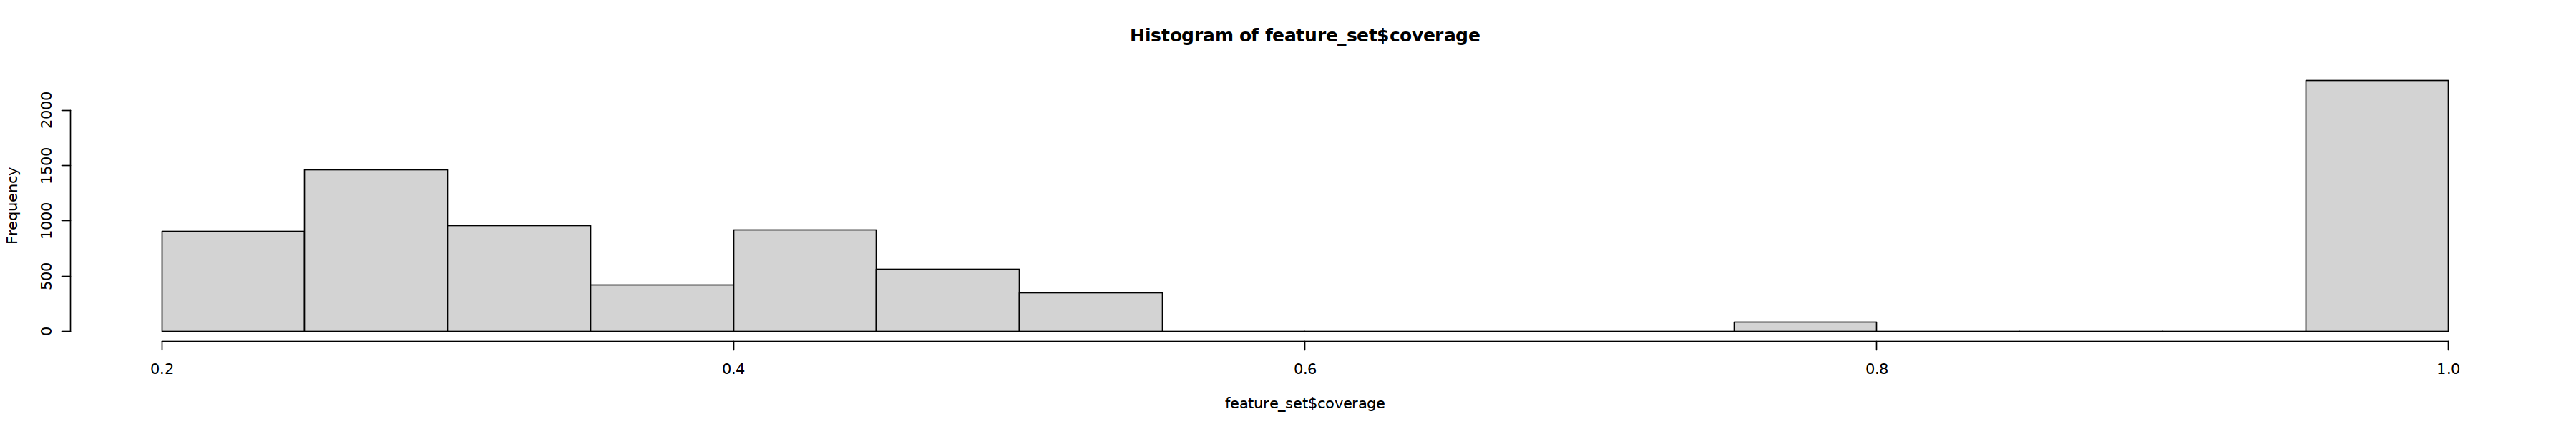

In [253]:
### Visualize distribution of coverage after filtering
options(repr.plot.width=30, repr.plot.height=5)
hist(feature_set$coverage)

In [254]:
### Remove NA entries for not mapped genes in feature set

In [255]:
feature_set = feature_set[!is.na(feature_set$SYMBOL),]

In [256]:
nrow(feature_set)

[1] 4244

In [257]:
head(feature_set,2)

,pathway,name,gene_id,Category,Name,SYMBOL,n,gene_amount,matched_amount,coverage
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,ALL,ALL,23131,All,ALL,GPATCH8,1,2271,2269,0.9991193
2,ALL,ALL,10664,All,ALL,CTCF,1,2271,2269,0.9991193


In [258]:
### Transform to binary matrix format

In [259]:
feature_set$pathway_id = paste0(feature_set$name,'_', feature_set$pathway)

In [260]:
feature_set$value = 1

In [261]:
feature_set_kegg = feature_set

In [262]:
nrow(feature_set_kegg)

[1] 4244

In [263]:
### Adjust names for overall approach

In [264]:
feature_weights_long_mapped_join = unique(feature_weights_long_mapped[,c('gene', 'variable_name')])

In [265]:
head(feature_weights_long_mapped_join,2)

,gene,variable_name
,<chr>,<chr>
1,A1BG,A1BG_M0R009
2,A1BG,A1BG_P04217.2


In [266]:
feature_set_kegg_all = merge(feature_set_kegg, feature_weights_long_mapped_join, by.x = 'SYMBOL', by.y = 'gene')

In [267]:
feature_set_kegg_data = feature_set_kegg
feature_set_kegg_all_data = feature_set_kegg_all

In [268]:
nrow(feature_set_kegg_all)

[1] 18094

In [269]:
### Binarize!
feature_set = feature_set %>% dcast(pathway_id ~ SYMBOL, value.var = 'value')
feature_set[is.na(feature_set)]= 0


feature_set_kegg_all = feature_set_kegg_all %>% dcast(pathway_id ~ variable_name, value.var = 'value')

In [270]:
feature_set_kegg_all[is.na(feature_set_kegg_all)] = 0

In [271]:
## Investigate total amount of features
length(unique(gene_mapping$ENTREZID))

[1] 2970

In [272]:
head(feature_set,2)

,pathway_id,A1BG,A2M,AAK1,AATK,ABCA7,ABCF1,ABHD17A,ABHD2,ABHD5,⋯,ZNF644,ZNF655,ZNF706,ZNF791,ZNF800,ZNFX1,ZNHIT1,ZRANB2,ZSWIM6,ZYX
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALL_ALL,1,0,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,Antigen processing and presentation_hsa04612,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [273]:
#colnames(feature_set_kegg_all)

In [274]:
head(feature_set_kegg_all[,100:150],2)

,ATG3,ATP2A3,ATP2B1,ATP5F1B,ATP5ME,ATP5MF,ATP5MG,ATP5MJ,ATP5PF,ATP6,⋯,BSG,BST1,BST1_A6NC48,BTD_P43251,BTG2,BUD31,C15orf39,C16orf54,C16orf72,C1orf56
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [275]:
rownames(feature_set) = feature_set$pathway_id
rownames(feature_set_kegg_all) = feature_set_kegg_all$pathway_id

In [276]:
feature_set$pathway_id = NULL
feature_set_kegg_all$pathway_id = NULL

In [277]:
feature_set = as.matrix(feature_set)
feature_set_kegg_all = as.matrix(feature_set_kegg_all)

In [278]:
head(feature_set,2)

,A1BG,A2M,AAK1,AATK,ABCA7,ABCF1,ABHD17A,ABHD2,ABHD5,ABI1,⋯,ZNF644,ZNF655,ZNF706,ZNF791,ZNF800,ZNFX1,ZNHIT1,ZRANB2,ZSWIM6,ZYX
ALL_ALL,1,0,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
Antigen processing and presentation_hsa04612,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [279]:
head(feature_set_kegg_all,2)

,A1BG_M0R009,A1BG_P04217.2,A2M_P01023,AATK,ABCA7,ABHD2,ABHD5,ABI3BP_D3YTG3,ABTB1,ACAP2,⋯,ZBTB7B,ZC3HAV1,ZFAND5,ZFAS1,ZFP36L2,ZMAT2,ZNF106,ZNF281,ZNF467,ZNFX1
ALL_ALL,1,1,0,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
Antigen processing and presentation_hsa04612,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [280]:
feature_set_kegg = feature_set

### REACTOME

In [200]:
#### For reactome 

In [201]:
head(pathway_genes,2)

,pathway,gene_id,SYMBOL,name
,<chr>,<chr>,<chr>,<chr>
1,R-HSA-1059683,7297,TYK2,Homo sapiens: Interleukin-6 signaling
2,R-HSA-1059683,3572,IL6ST,Homo sapiens: Interleukin-6 signaling


In [202]:
### Generate Term2Gene (pathways + genes) and Term2 Name (pathways + names) matrix 

In [203]:
term2gene = unique(pathway_genes[,c('pathway', 'SYMBOL')])

In [204]:
term2name = unique(pathway_genes[,c('pathway', 'name')])

In [205]:
term2name$name = str_replace(term2name$name, 'Homo sapiens:', '')

In [206]:
### Choose whether to filter only on relevant immune pathways

In [207]:
filter_immune = TRUE

In [208]:
if(filter_immune == TRUE){
    term2gene = merge(term2gene, immune_system_pathways, by.x = 'pathway', by.y = 'pathway')
    }
    

In [209]:
### Remove pathways with low amount of coverage/ matching genes

In [210]:
term2gene = merge(term2gene, gene_mapping, all.x = TRUE) # merge feature set taken into account, ENTREZID as indicator for found match

In [211]:
head(term2gene,2)

,SYMBOL,pathway,index,ENTREZID
,<chr>,<chr>,<int>,<chr>
1,A1BG,R-HSA-168249,4,1
2,A1BG,R-HSA-168256,1,1


In [212]:
filter_pathways = term2gene %>% group_by(pathway) %>% summarise(amount_na = sum(is.na(ENTREZID)), total_amount = n())

In [213]:
filter_pathways$coverage =1 - ( filter_pathways$amount_na/ filter_pathways$total_amount)

In [214]:
head(filter_pathways[filter_pathways$pathway == 'R-HSA-1059683',],2)

pathway,amount_na,total_amount,coverage
<chr>,<int>,<int>,<dbl>
R-HSA-1059683,4,11,0.6363636


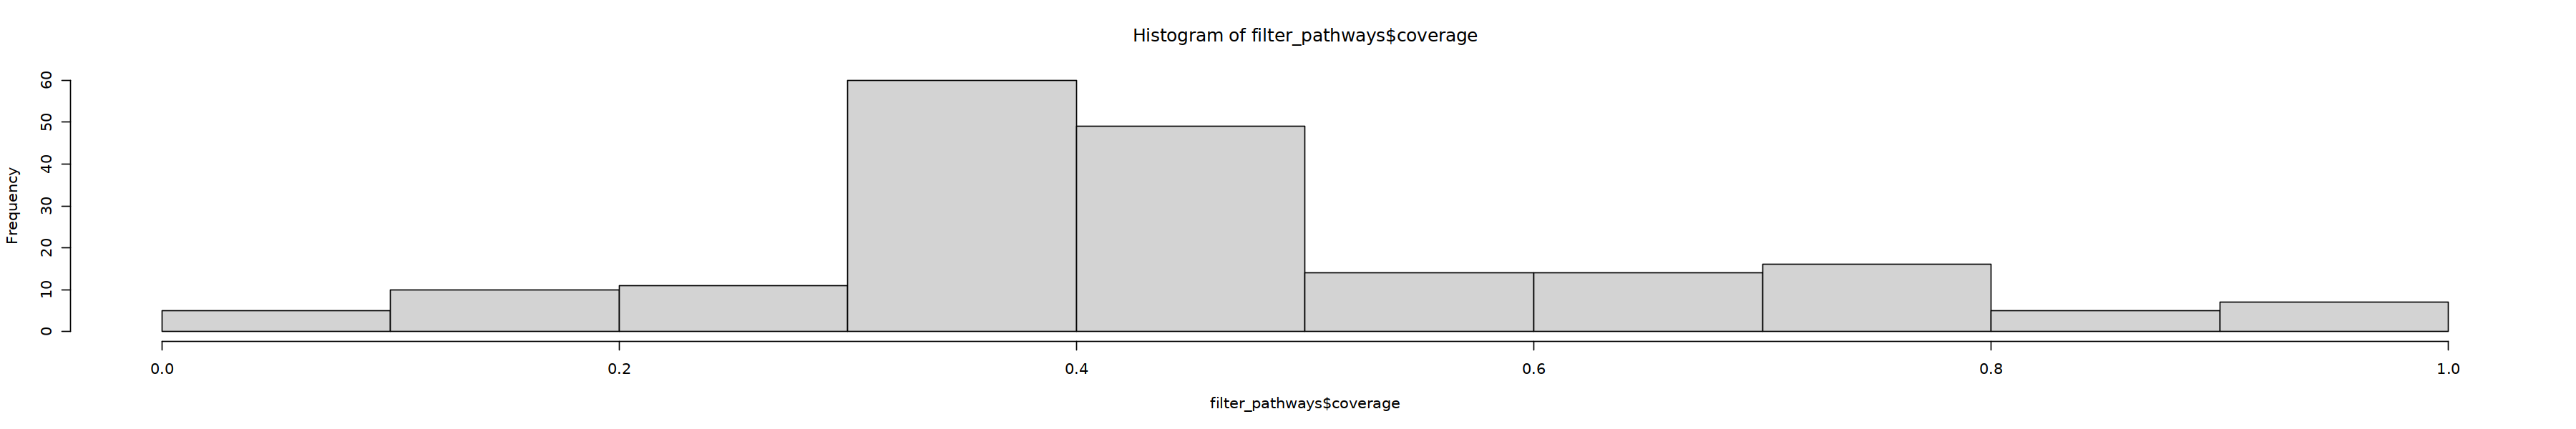

In [215]:
### Investigate distribution of coverage
options(repr.plot.width=30, repr.plot.height=5)
hist(filter_pathways$coverage)

In [216]:
nrow(filter_pathways)

[1] 191

In [217]:
head(filter_pathways,2)

pathway,amount_na,total_amount,coverage
<chr>,<int>,<int>,<dbl>
R-HSA-1059683,4,11,0.6363636
R-HSA-1168372,43,83,0.4819277


In [218]:
keep_pathways = filter_pathways[filter_pathways$coverage >= coverage_par,]  # decide which pathways to keep

In [219]:
removed_pathways = unique(filter_pathways$pathway[filter_pathways$coverage < coverage_par])

In [220]:
removed_pathways

[1] "R-HSA-1170546" "R-HSA-1461957" "R-HSA-1461973" "R-HSA-1606341"
 [5] "R-HSA-199920"  "R-HSA-3248023" "R-HSA-5669034" "R-HSA-6788467"
 [9] "R-HSA-8851680" "R-HSA-8983711" "R-HSA-9007892" "R-HSA-9013957"
[13] "R-HSA-9014826" "R-HSA-933541"  "R-HSA-933543"

In [221]:
length(removed_pathways) # amount removed pathways

[1] 15

In [222]:
keep_pathways = unique(keep_pathways$pathway)

In [223]:
### Show removed pathways due to low coverage
term2name[term2name$pathway %in% removed_pathways,]

,pathway,name
,<chr>,<chr>
4166,R-HSA-1170546,Prolactin receptor signaling
12459,R-HSA-1461957,Beta defensins
12499,R-HSA-1461973,Defensins
16160,R-HSA-1606341,IRF3 mediated activation of type 1 IFN
39632,R-HSA-199920,CREB phosphorylation
52601,R-HSA-3248023,Regulation by TREX1
84444,R-HSA-5669034,TNFs bind their physiological receptors
90565,R-HSA-6788467,IL-6-type cytokine receptor ligand interactions
109902,R-HSA-8851680,Butyrophilin (BTN) family interactions


In [224]:
### Apply filter on term2gene and term2name (filter out pathways)
term2gene = term2gene[term2gene$pathway %in% keep_pathways,]
term2name = term2name[term2name$pathway %in% keep_pathways,]

In [225]:
nrow(term2name)

[1] 176

In [226]:
#### Remove NA's
term2gene = term2gene[!is.na(term2gene$ENTREZID),]

In [227]:
#### Add dummy pathway (to make sure that all MOFA included features are used as background genes if they are not part of the pathway)

In [228]:
term2gene$ENTREZID = NULL

In [229]:
term2gene$index = NULL

In [230]:
head(term2gene,2)

,SYMBOL,pathway
,<chr>,<chr>
1,A1BG,R-HSA-168249
2,A1BG,R-HSA-168256


In [231]:
add = data.frame(pathway = 'ALL',SYMBOL= unique(gene_mapping$SYMBOL)[!(unique(gene_mapping$SYMBOL) %in% unique(term2gene$SYMBOL))])

In [232]:
length(unique(term2gene$SYMBOL))

[1] 774

In [233]:
length(gene_mapping$SYMBOL)

[1] 2972

In [234]:
nrow(add)

[1] 2197

In [235]:
head(add,2)

,pathway,SYMBOL
,<chr>,<chr>
1,ALL,CXCL13
2,ALL,CCL27


In [236]:
term2gene$n = NULL

In [237]:
term2gene = rbind(term2gene, add)

In [238]:
#### Generate binary format for feature set

In [239]:
#head(term2gene,3)

In [240]:
term2gene[(term2gene$pathway == 'R-HSA-168249') & (term2gene$SYMBOL == 'ABI1'),]

,SYMBOL,pathway
,<chr>,<chr>
23,ABI1,R-HSA-168249


In [241]:
term2gene = term2gene %>% group_by(SYMBOL, pathway) %>% count() %>% filter(n < 2)   # make sure that there are not duplicates

In [242]:
term2gene$value = 1

In [243]:
head(term2gene,2)

SYMBOL,pathway,n,value
<chr>,<chr>,<int>,<dbl>
A1BG,R-HSA-168249,1,1
A1BG,R-HSA-168256,1,1


In [244]:
### Adjust names for overall approach and generate a second term2gene dataset

In [245]:
feature_weights_long_mapped_join = unique(feature_weights_long_mapped[,c('gene', 'variable_name')])

In [246]:
head(feature_weights_long_mapped_join,2)

,gene,variable_name
,<chr>,<chr>
1,A1BG,A1BG_M0R009
2,A1BG,A1BG_P04217.2


In [247]:
term2gene_all = merge(term2gene,feature_weights_long_mapped_join, by.x = 'SYMBOL', by.y = 'gene')

In [248]:
## Two versions:
# feature_set_all: mapping to joined feature set (consiting of cell-type + gene)
# feature_set: mapping to genes directly for cluster-specific enrichment

In [249]:
feature_set_all = term2gene_all %>% dcast(pathway ~ variable_name, value.var = 'value')

In [250]:
feature_set = term2gene %>% dcast(pathway ~ SYMBOL, value.var = 'value')

In [251]:
feature_set[is.na(feature_set)] = 0 
feature_set_all[is.na(feature_set_all)] = 0 

In [252]:
### Convert to matrix

In [253]:
rownames(feature_set) = feature_set$pathway
rownames(feature_set_all) = feature_set_all$pathway

In [254]:
feature_set$pathway = NULL
feature_set_all$pathway = NULL

In [255]:
feature_set = as.matrix(feature_set)
feature_set_all = as.matrix(feature_set_all)

In [256]:
head(feature_set,2)

,A1BG,A2M,AAK1,AATK,ABCA7,ABCF1,ABHD17A,ABHD2,ABHD5,ABI1,⋯,ZNF644,ZNF655,ZNF706,ZNF791,ZNF800,ZNFX1,ZNHIT1,ZRANB2,ZSWIM6,ZYX
ALL,0,1,1,1,1,1,1,1,1,0,⋯,1,1,1,1,1,1,1,1,1,1
R-HSA-1059683,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [257]:
### Save reactome feature sets

In [258]:
feature_set_reactome = feature_set
feature_set_reactome_all = feature_set_all

## Run Enrichment

### KEGG (view_level)

In [340]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [342]:
enrichment_result_p_val_adjusted_kegg_cluster = run_enrichment_pathway(
    model = model, # MOFA Model
    factor_set = factor_set, # list of factors for which to run the enrichment
    views = names(features_names(model))[!names(features_names(model)) %in% c('clinical_data', 'cytokine')] , 
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_kegg, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Intersecting features names in the model and the gene set annotation results in a total of 862 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 40 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 862 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 40 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weights with negative sign




Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 862 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 40 
Set statistic: rank.sum 
Statistical test: param

In [343]:
### Save the result as potential supplementary table

In [344]:
significance_threshold = 0.05

In [345]:
save_enrichment_kegg_cluster = enrichment_result_p_val_adjusted_kegg_cluster[enrichment_result_p_val_adjusted_kegg_cluster$value <= significance_threshold,]

In [346]:
save_enrichment_kegg_cluster = save_enrichment_kegg_cluster[save_enrichment_kegg_cluster$pathway != 'ALL_ALL',]

In [347]:
colnames(save_enrichment_kegg_cluster) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [348]:
write.csv(save_enrichment_kegg_cluster, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Kegg_Cluster.csv'), row.names = FALSE)

### REACTOME (view_level)

In [259]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [260]:
enrichment_result_p_val_adjusted_reactome_cluster = run_enrichment_pathway(
    model = model, # MOFA Model
    factor_set = factor_set, # list of factors for which to run the enrichment
    views = names(features_names(model))[!names(features_names(model)) %in% c('clinical_data', 'cytokine')] ,
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_reactome, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Intersecting features names in the model and the gene set annotation results in a total of 885 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 89 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 885 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 89 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weights with negative sign




Using pathway as id variables

Using pathway as id variables

Intersecting features names in the model and the gene set annotation results in a total of 885 features.


Running feature set Enrichment Analysis with the following options...
View: neutrophil 
Number of feature sets: 89 
Set statistic: rank.sum 
Statistical test: param

In [261]:
### Save the result as potential supplementary table

In [262]:
significance_threshold = 0.05

In [263]:
save_enrichment_reactome_cluster = enrichment_result_p_val_adjusted_reactome_cluster[enrichment_result_p_val_adjusted_reactome_cluster$value <= significance_threshold,]

In [264]:
colnames(save_enrichment_reactome_cluster) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [265]:
nrow(save_enrichment_reactome_cluster)

[1] 84

In [266]:
save_enrichment_reactome_cluster = merge(save_enrichment_reactome_cluster, term2name)

In [267]:
head(save_enrichment_reactome_cluster,2)

,pathway,factor,pval_adj,view,enrichment,name
,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>
1,R-HSA-1168372,Factor5,0.040120883,X4_MonocytesCD14,negative,Downstream signaling events of B Cell Receptor (BCR)
2,R-HSA-1236974,Factor5,0.000564065,X4_MonocytesCD14,negative,ER-Phagosome pathway


In [268]:
write.csv(save_enrichment_reactome_cluster, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Reactome_Cluster.csv'), row.names = FALSE)

### REACTOME_all

In [269]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [270]:
enrichment_result_p_val_adjusted_reactome_all = run_enrichment_pathway(
    model = model_conc, # MOFA Model
    views = 'complete', # dimensions for which to run
    factor_set = factor_set, # list of factors for which to run the enrichment
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_reactome_all, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12730 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 173 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12730 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 173 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weight

In [271]:
#### Save the result

In [272]:
significance_threshold = 0.05

In [273]:
save_enrichment_reactome_all = enrichment_result_p_val_adjusted_reactome_all[enrichment_result_p_val_adjusted_reactome_all$value <= significance_threshold,]

In [274]:
save_enrichment_reactome_all = save_enrichment_reactome_all[save_enrichment_reactome_all$pathway != 'ALL',]

In [275]:
colnames(save_enrichment_reactome_all) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [276]:
save_enrichment_reactome_all = merge(save_enrichment_reactome_all, term2name)

In [277]:
head(save_enrichment_reactome_all,2)

,pathway,factor,pval_adj,view,enrichment,name
,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>
1,R-HSA-1059683,Factor1,0.002832958,complete,all,Interleukin-6 signaling
2,R-HSA-1059683,Factor5,0.044333648,complete,positive,Interleukin-6 signaling


In [278]:
write.csv(save_enrichment_reactome_all, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Reactome_Overall.csv'), row.names = FALSE)

### KEGG all

In [369]:
### Run enrichment for all views and positive/ negative/ all combinations and save in an empty dataframe

In [370]:
enrichment_result_p_val_adjusted_kegg_all = run_enrichment_pathway(
    model = model_conc, # MOFA Model
    views = 'complete', # dimensions for which to run
    factor_set = factor_set, # list of factors for which to run the enrichment
    use_statistic = use_statistic, # which statistic to use
    feature_set = feature_set_kegg_all, # Pathway Feature Set mapping
    min_size = min_size, # Min size of genes within a pathway
    use_test = use_test, # test used for calculating p-value
    p_val_cutoff = p_val_cutoff, # p-value cutoff used
    enrichment_result_p_val = data.frame(), # dataset for saving results
    enrichment_result_p_val_adjusted = data.frame())# dataset for saving result 

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12554 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 43 
Set statistic: rank.sum 
Statistical test: parametric 





Using pathway as id variables

Using pathway as id variables

Warning message in run_enrichment(model, view = i, factors = factor_set, set.statistic = c(use_statistic), :
“6 features were removed because they had no variance in the data.
”
Intersecting features names in the model and the gene set annotation results in a total of 12554 features.


Running feature set Enrichment Analysis with the following options...
View: complete 
Number of feature sets: 43 
Set statistic: rank.sum 
Statistical test: parametric 


Subsetting weights 

In [371]:
### Save the result as potential supplementary table

In [372]:
significance_threshold = 0.05

In [373]:
save_enrichment_kegg_all = enrichment_result_p_val_adjusted_kegg_all[enrichment_result_p_val_adjusted_kegg_all$value <= significance_threshold,]

In [374]:
save_enrichment_kegg_all = save_enrichment_kegg_all[save_enrichment_kegg_all$pathway != 'ALL_ALL',]

In [375]:
head(save_enrichment_kegg_all,2)

,pathway,variable,value,view,enrichment
,<chr>,<fct>,<dbl>,<chr>,<chr>
2,Antigen processing and presentation_hsa04612,Factor1,3.398874e-05,complete,all
9,Chemokine signaling pathway_hsa04062,Factor1,3.284202e-07,complete,all


In [376]:
colnames(save_enrichment_kegg_all) = c('pathway', 'factor', 'pval_adj', 'view', 'enrichment')

In [377]:
write.csv(save_enrichment_kegg_all, paste0(result_path, '/Supplementary/SUPP_E6_Pathway_Enrichments_Kegg_All.csv'), row.names = FALSE)

# Visualize Results

In [328]:
## Here for reactome overall results (can also be investigated for other enrichment results)

### Get significant results

In [279]:
## Set significance threshold for filtering
significance_threshold = 0.05

In [280]:
### Investigate significant results (here for reactome; exchange  enrichment_result_p_val_adjusted_reactome_all by other generated dataset to investigate)

In [281]:
enrichment_result_p_val_adjusted = enrichment_result_p_val_adjusted_reactome_all[enrichment_result_p_val_adjusted_reactome_all$value <= significance_threshold,]

In [282]:
head(enrichment_result_p_val_adjusted,2)

,pathway,variable,value,view,enrichment
,<chr>,<fct>,<dbl>,<chr>,<chr>
1,ALL,Factor1,0.009642248,complete,all
2,R-HSA-1059683,Factor1,0.002832958,complete,all


In [283]:
### Amount significant pathwaya
nrow(enrichment_result_p_val_adjusted)

[1] 610

In [284]:
### Amount per factor and type of enrichment
enrichment_result_p_val_adjusted %>% group_by(variable, enrichment) %>% count()

variable,enrichment,n
<fct>,<chr>,<int>
Factor1,all,79
Factor1,negative,56
Factor1,positive,40
Factor2,all,87
Factor2,negative,60
Factor2,positive,50
Factor3,all,8
Factor3,negative,38
Factor3,positive,12


In [285]:
### Add pathway names to enrichment result

In [286]:
enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, term2name, )

In [287]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [288]:
### Add covarage from Reactome pathways

In [289]:
head(filter_pathways,2)

pathway,amount_na,total_amount,coverage
<chr>,<int>,<int>,<dbl>
R-HSA-1059683,4,11,0.6363636
R-HSA-1168372,43,83,0.4819277


In [290]:
enrichment_result_p_val_adjusted = merge(enrichment_result_p_val_adjusted, filter_pathways)

In [291]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [292]:
### Improve textual description of clusters (cell-types)

In [293]:
enrichment_result_p_val_adjusted$view = paste0(str_replace(enrichment_result_p_val_adjusted$view, 'X.*_', ''), '_', str_replace(enrichment_result_p_val_adjusted$view, '_.*', ''))

In [294]:
head(enrichment_result_p_val_adjusted,2)

,pathway,variable,value,view,enrichment,name,amount_na,total_amount,coverage
,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
1,R-HSA-1059683,Factor2,0.0005759461,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636
2,R-HSA-1059683,Factor5,0.0443336482,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636


In [295]:
## Add clustering/ grouping of pathways (calculated for reactome pathways)

In [296]:
head(pathways_clustered,2)

,pathway,cluster,name
,<chr>,<int>,<chr>
1,R-HSA-1059683,12,Homo sapiens: Interleukin-6 signaling
2,R-HSA-1168372,10,Homo sapiens: Downstream signaling events of B Cell Receptor (BCR)


In [297]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [298]:
enrichment_result_p_val_adjusted =merge(enrichment_result_p_val_adjusted, pathways_clustered[,c('pathway', 'cluster')], by.x = 'pathway', by.y = 'pathway')

In [299]:
nrow(enrichment_result_p_val_adjusted)

[1] 604

In [300]:
head(enrichment_result_p_val_adjusted,2)

,pathway,variable,value,view,enrichment,name,amount_na,total_amount,coverage,cluster
,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,R-HSA-1059683,Factor2,0.0005759461,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636,12
2,R-HSA-1059683,Factor5,0.0443336482,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636,12


In [301]:
enrichment_result_p_val_adjusted_w_o_direction = enrichment_result_p_val_adjusted %>% group_by(pathway,variable, view,name, cluster) %>% summarise(value = mean(value))

`summarise()` has grouped output by 'pathway', 'variable', 'view', 'name'. You
can override using the `.groups` argument.


In [302]:
head(enrichment_result_p_val_adjusted,2)

,pathway,variable,value,view,enrichment,name,amount_na,total_amount,coverage,cluster
,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,R-HSA-1059683,Factor2,0.0005759461,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636,12
2,R-HSA-1059683,Factor5,0.0443336482,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636,12


In [303]:
summarized = enrichment_result_p_val_adjusted %>% dcast(pathway + variable ~ enrichment, value.var = 'value')

In [304]:
head(summarized,2)

,pathway,variable,all,negative,positive
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,R-HSA-1059683,Factor1,0.002832958,NA,NA
2,R-HSA-1059683,Factor2,NA,NA,0.0005759461


In [305]:
summarized[(!is.na(summarized$negative)) & (!is.na(summarized$positive)),]
# check that pathway is not enriched positively and negatively at the same time

pathway,variable,all,negative,positive
<chr>,<fct>,<dbl>,<dbl>,<dbl>


In [306]:
head(summarized[(!is.na(summarized$negative)) & (!is.na(summarized$all)),],2)

,pathway,variable,all,negative,positive
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
5,R-HSA-1168372,Factor2,1.171255e-07,8.612608e-04,NA
8,R-HSA-1169091,Factor2,1.562705e-07,7.804420e-06,NA


### Visualize all enriched pathways

In [307]:
### Visualize result

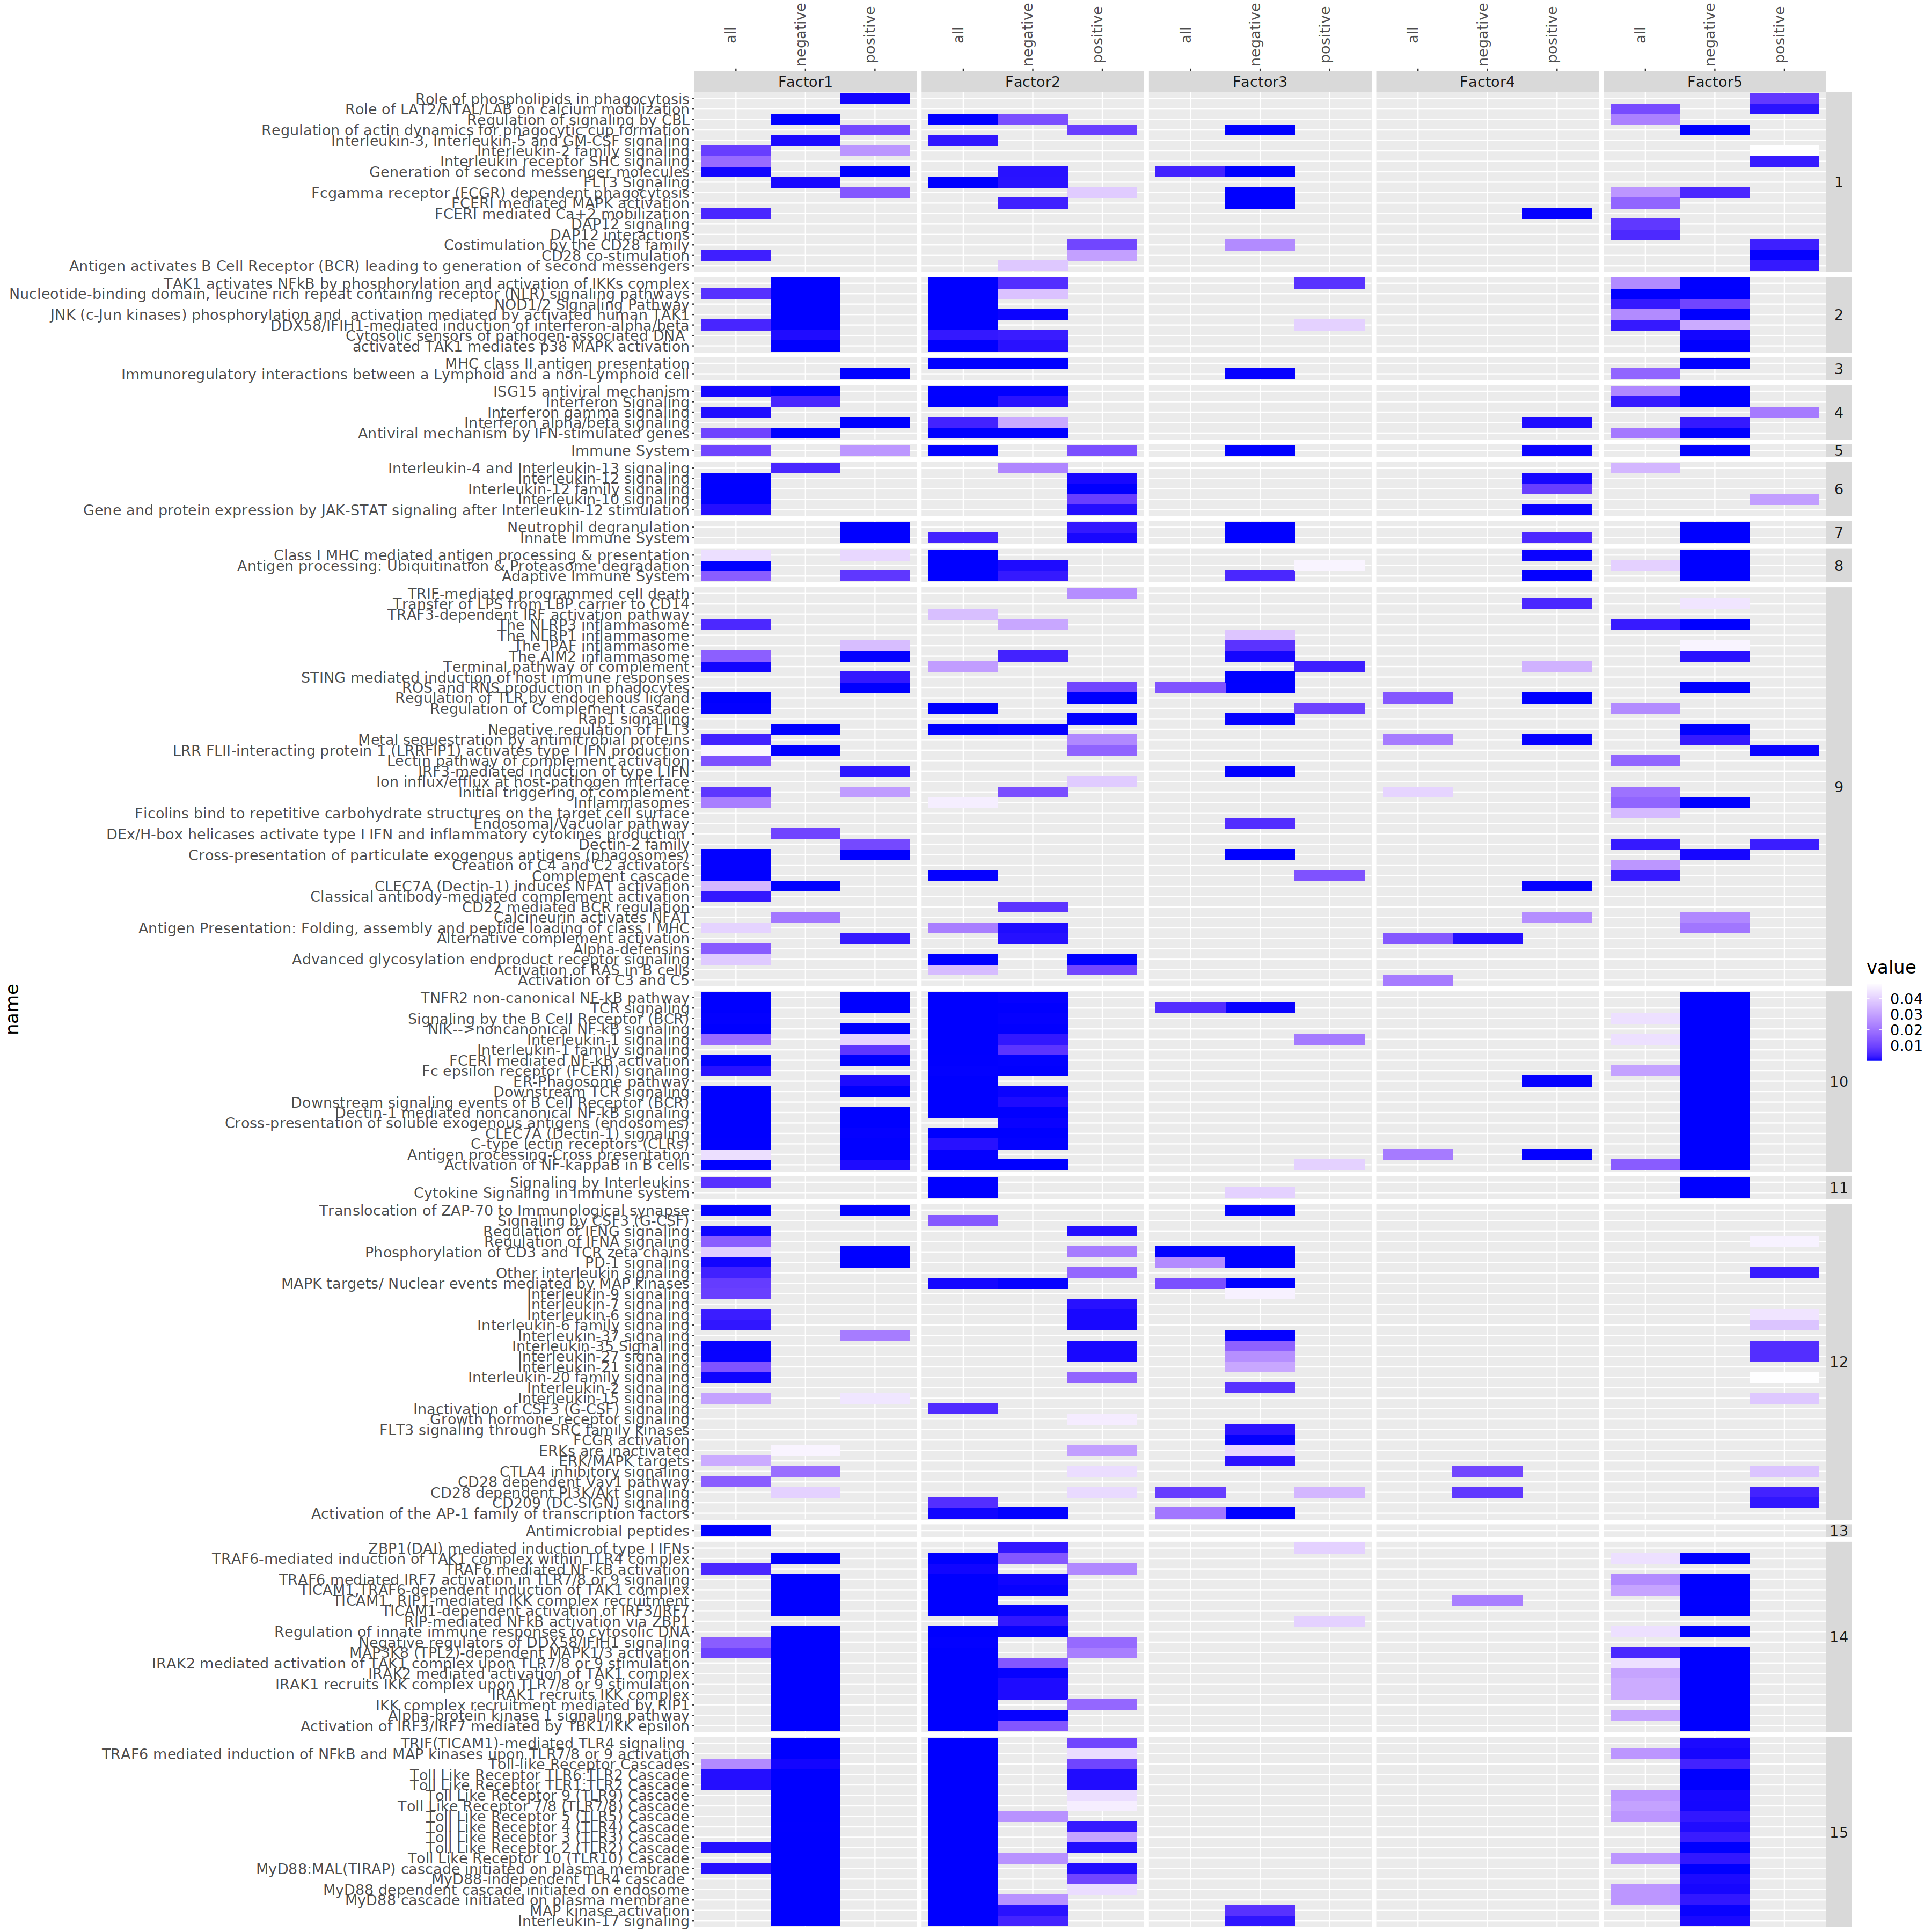

In [308]:
options(repr.plot.width=30, repr.plot.height=30)
ggplot(enrichment_result_p_val_adjusted[ (enrichment_result_p_val_adjusted$enrichment %in% c('all', 'positive', 'negative')),], 
       aes(enrichment, name, fill= value)) + 
    theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + 
    facet_grid(cluster ~ variable, space = 'free' , scales = 'free') + 
    scale_x_discrete(position = "top")  

### Visualize all enriched pathways on a factor

In [310]:
select_factor = 'Factor2'  # choose factor that should be visualized

In [311]:
plot_data = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [312]:
head(plot_data,2)

,pathway,variable,value,view,enrichment,name,amount_na,total_amount,coverage,cluster
,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,R-HSA-1059683,Factor2,0.0005759461,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636,12
4,R-HSA-1168372,Factor2,0.0008612608,complete_complete,negative,Downstream signaling events of B Cell Receptor (BCR),43,83,0.4819277,10


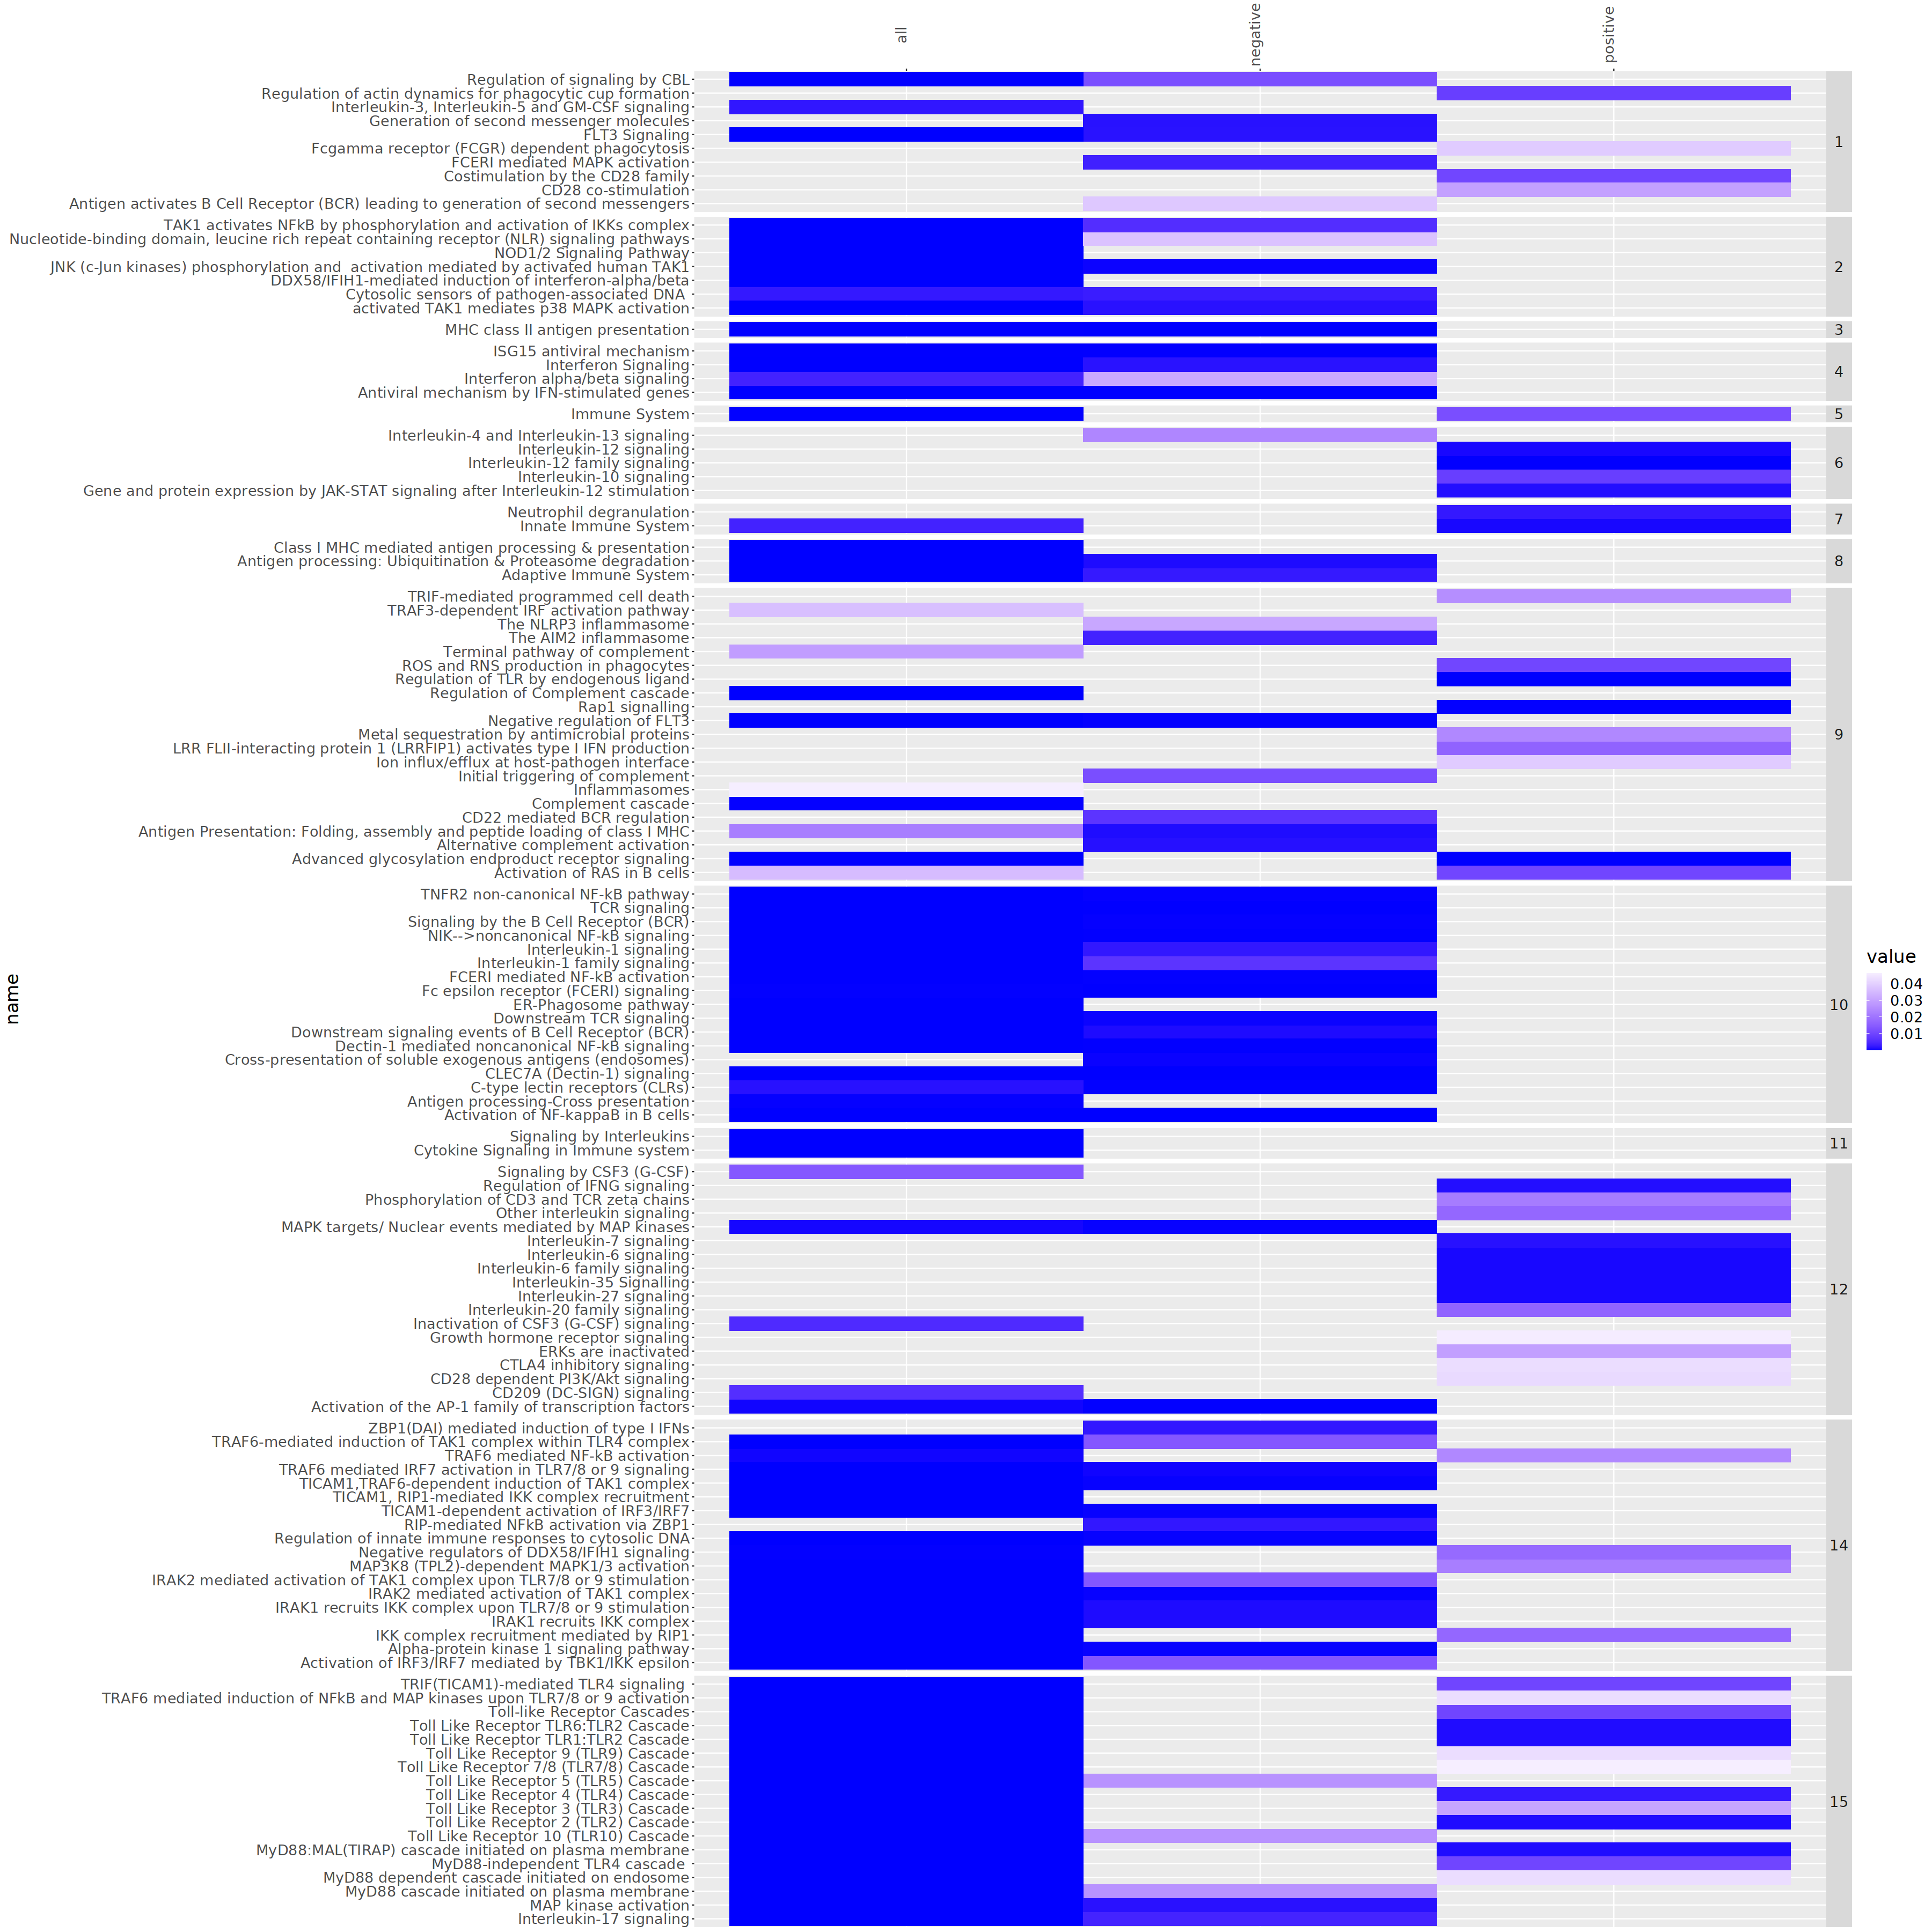

In [313]:
options(repr.plot.width=30, repr.plot.height=30)
ggplot(plot_data, 
       aes(enrichment, name, fill= value)) + 
    theme(text = element_text(size=20), axis.text.x=element_text(angle=90), strip.text.y.right =element_text(angle=0),  axis.title.x=element_blank()) + 
    geom_tile() + 
    facet_grid(cluster ~ ., space = 'free' , scales = 'free') + 
    scale_fill_gradient2(low = "blue", mid = 'white', high = "red", midpoint = 0.05) + 
    scale_x_discrete(position = "top")  

### Inspect Top Pathways of a Factor

In [315]:
### Selection of parameters to define which pathways should be visualized

In [316]:
select_factor = 'Factor2'  # choose factor that should be visualized

In [317]:
select_enrichment = c('positive')  # choose type of enrichment that should be visualized

In [318]:
min_coverage = 0.5  # choose min coverage based on which visualized pathways will be filtered (e.g.: only pathways with coverage > 0.5)

In [323]:
### Filter plot data on parameters

In [328]:
# filter on factor
plot_data = enrichment_result_p_val_adjusted[enrichment_result_p_val_adjusted$variable == select_factor,]

In [329]:
nrow(plot_data)

[1] 196

In [330]:
# enrichment type
plot_data_subset = plot_data[plot_data$enrichment %in%  select_enrichment,]

In [331]:
nrow(plot_data_subset)

[1] 50

In [332]:
# coverage
plot_data_subset = plot_data_subset[plot_data_subset$coverage > min_coverage,]

In [333]:
nrow(plot_data_subset)

[1] 14

In [334]:
# remove big pathways
plot_data_subset = plot_data_subset[plot_data_subset$total_amount < 100,]

In [335]:
### Visualize the pathways (p-value + coverage)

In [336]:
plot_data_subset$dummy = 'pvalue'

In [337]:
# Specific Text Descriptions:
xlabel = xlab('') 
ylabel = ylab('Pathway')

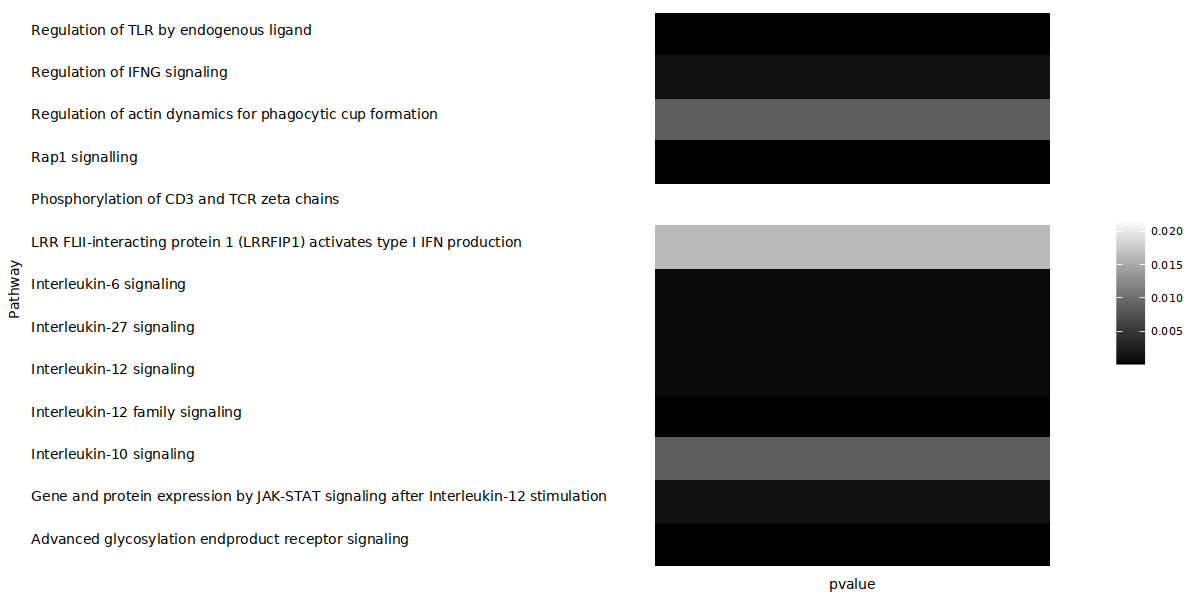

In [338]:
options(repr.plot.width=10, repr.plot.height=5)
pvalue_heatmap = ggplot(plot_data_subset, aes(x = dummy, y =name, fill = value)) +
  geom_tile() +   plot_config_heatmap + scale_fill_gradient(low = 'black', high = 'white')  +
  theme(axis.title.x = element_blank()) + ylabel
  #facet_grid(cluster ~., space = 'free', scales = 'free', switch = 'y')+

pvalue_heatmap

In [339]:
# Specific Text Descriptions:
xlabel = xlab('Pathways') 
ylabel = ylab('Coverage')

In [340]:
options(repr.plot.width=10, repr.plot.height=5)
coverage_line_plot = ggplot(plot_data_subset, aes(x = name, y = coverage)) +
  geom_col(width = 0.1) + coord_flip() +
  #facet_grid(cluster ~., space = 'free', scales = 'free', switch = 'y')+
  plot_config  + xlabel + ylabel
    

In [341]:
figure_name = "FIG6_E6_Top_Pathways"

In [342]:
# Sizes of the plot
width_par = 8.07
height_par = 2.8

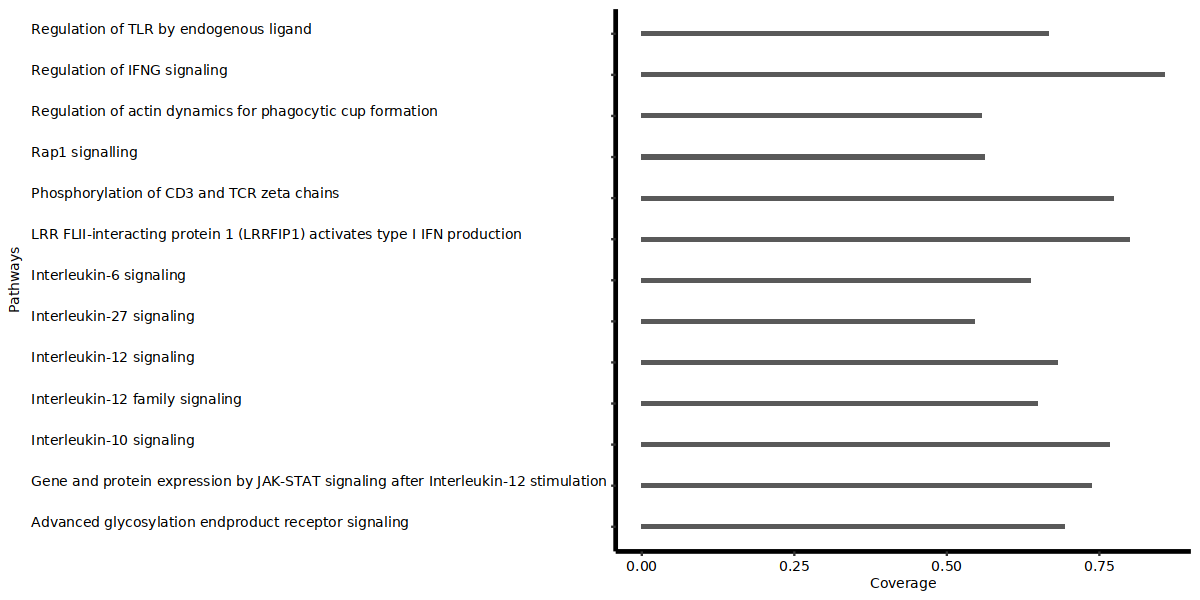

In [343]:
coverage_line_plot

In [344]:
legend = get_legend(pvalue_heatmap)

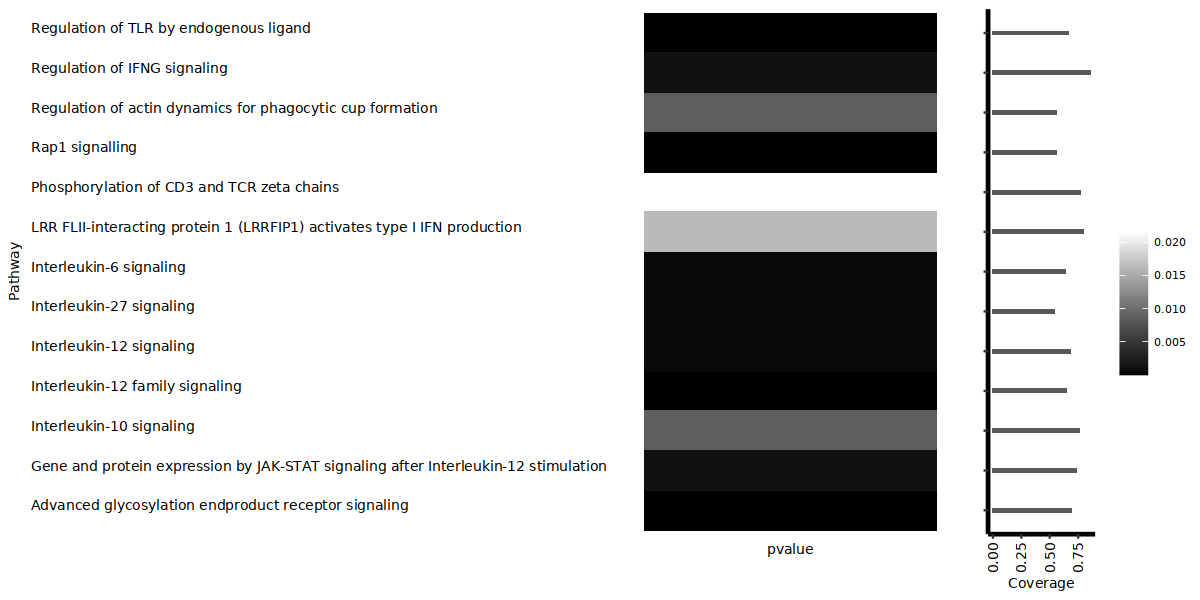

In [345]:
combined = ggarrange (pvalue_heatmap + theme(legend.position = 'none'), coverage_line_plot + theme(axis.text.y = element_blank(), axis.title.y = element_blank(), axis.text.x = element_text(angle = 90)), align = 'h', nrow = 1, widths = c(7.5,1))
combined = annotate_figure(combined, right = legend)
combined

In [346]:
#head(plot_data_subset[order(plot_data_subset$value, decreasing = FALSE),],20)

In [347]:
pdf(paste0('figures/Final_Figures/', figure_name, '.pdf'), width =width_par, height =height_par)
print(combined)
dev.off()

png 
  2

In [348]:
#head(plot_data_subset[order(plot_data_subset$coverage, decreasing = TRUE),],10)

### Visualize top genes and pathways for a selected factor

In [349]:
### Select a set of pathways to visualize

In [350]:
## select same pathways as selected in previous plot
pathways_selection = unique(plot_data_subset$pathway)

In [351]:
unique(plot_data_subset[,c('pathway', 'name')])

,pathway,name
,<chr>,<chr>
1,R-HSA-1059683,Interleukin-6 signaling
210,R-HSA-202427,Phosphorylation of CD3 and TCR zeta chains
235,R-HSA-2029482,Regulation of actin dynamics for phagocytic cup formation
263,R-HSA-3134973,LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production
295,R-HSA-392517,Rap1 signalling
307,R-HSA-447115,Interleukin-12 family signaling
389,R-HSA-5686938,Regulation of TLR by endogenous ligand
401,R-HSA-6783783,Interleukin-10 signaling
432,R-HSA-877312,Regulation of IFNG signaling


In [352]:
length(pathways_selection)

[1] 13

In [353]:
pathways_selection

[1] "R-HSA-1059683" "R-HSA-202427"  "R-HSA-2029482" "R-HSA-3134973"
 [5] "R-HSA-392517"  "R-HSA-447115"  "R-HSA-5686938" "R-HSA-6783783"
 [9] "R-HSA-877312"  "R-HSA-879415"  "R-HSA-8950505" "R-HSA-9020591"
[13] "R-HSA-9020956"

In [354]:
### A3 Manual Selection (reduce pathways by manual selection)
pathways_selection = c('R-HSA-1059683', 'R-HSA-9020956', 'R-HSA-9020591' ,'R-HSA-6783783')

In [355]:
### Get the genes of the pathways that should be visualized (based on their rank on the MOFA factor)

In [356]:
select_thres = 0.125 # choose threshold of top x % of features of MOFA factor to take into account

In [357]:
### Get involved genes

In [358]:
## Define gene-set to merge
geneset_oi_pos_per_factor = feature_weights_long %>% group_by(variable) %>% arrange( desc(value),  .by_group = TRUE)  %>% top_frac(select_thres)
geneset_oi_pos_per_factor$direction = 'positive'
geneset_oi_neg_per_factor = feature_weights_long %>% group_by(variable) %>% arrange(desc(value),  .by_group = TRUE)  %>% top_frac(-select_thres)

geneset_oi_neg_per_factor$direction = 'negative'


Selecting by value
Selecting by value


In [359]:
geneset_oi = rbind(geneset_oi_pos_per_factor, geneset_oi_neg_per_factor)
#geneset_oi = geneset_oi_pos_per_factor

In [360]:
geneset_oi = geneset_oi[geneset_oi$variable == select_factor,]

In [361]:
nrow(geneset_oi)

[1] 3318

In [362]:
nrow(geneset_oi)

[1] 3318

In [363]:
head(geneset_oi,2)

type,variable_name,view,gene,variable,value,direction
<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
X0_TcellCD4,X0_T.cell.CD4__EIF3E,CD4+ T cells (Cluster 0),EIF3E,Factor2,0.5547538,positive
X0_TcellCD4,X0_T.cell.CD4__HINT1,CD4+ T cells (Cluster 0),HINT1,Factor2,0.5461578,positive


In [364]:
colnames(geneset_oi) = c('type', 'variable_name','view',  'gene', 'variable', 'factor_value', 'factor_value_direction')

In [365]:
head(geneset_oi,2)

type,variable_name,view,gene,variable,factor_value,factor_value_direction
<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
X0_TcellCD4,X0_T.cell.CD4__EIF3E,CD4+ T cells (Cluster 0),EIF3E,Factor2,0.5547538,positive
X0_TcellCD4,X0_T.cell.CD4__HINT1,CD4+ T cells (Cluster 0),HINT1,Factor2,0.5461578,positive


In [366]:
### Merge genes belongig to pathway to enriched pathway sets

In [367]:
### filter on factor
pathways_vis = enrichment_result_p_val_adjusted[(enrichment_result_p_val_adjusted$variable == select_factor) & (enrichment_result_p_val_adjusted$enrichment %in% select_enrichment),]

In [368]:
### Add genes to pathways

In [369]:
pathways_vis_genes = merge(pathways_vis, term2gene[,c('SYMBOL', 'pathway')], by.x = 'pathway', by.y = 'pathway')

In [370]:
head(pathways_vis_genes,2)

,pathway,variable,value,view,enrichment,name,amount_na,total_amount,coverage,cluster,SYMBOL
,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>
1,R-HSA-1059683,Factor2,0.0005759461,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636,12,SOCS3
2,R-HSA-1059683,Factor2,0.0005759461,complete_complete,positive,Interleukin-6 signaling,4,11,0.6363636,12,STAT3


In [371]:
colnames(pathways_vis_genes) = c('pathway', 'variable', 'pvalue', 'view_text', 'enrichment', 'name', 'amount_na', 'total_amount', 'coverage', 'cluster', 'SYMBOL')

In [372]:
head(geneset_oi,2)

type,variable_name,view,gene,variable,factor_value,factor_value_direction
<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>
X0_TcellCD4,X0_T.cell.CD4__EIF3E,CD4+ T cells (Cluster 0),EIF3E,Factor2,0.5547538,positive
X0_TcellCD4,X0_T.cell.CD4__HINT1,CD4+ T cells (Cluster 0),HINT1,Factor2,0.5461578,positive


In [373]:
### Add factor values of pathway genes (! with current implementation only filters on top genes as defined in geneset_oi)

In [374]:
pathways_vis_genes = merge(pathways_vis_genes, geneset_oi, by.x = c('SYMBOL', 'variable'), by.y = c('gene','variable' ))

In [375]:
head(pathways_vis_genes,2)

,SYMBOL,variable,pathway,pvalue,view_text,enrichment,name,amount_na,total_amount,coverage,cluster,type,variable_name,view,factor_value,factor_value_direction
,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,ABI1,Factor2,R-HSA-2029482,0.008565006,complete_complete,positive,Regulation of actin dynamics for phagocytic cup formation,27,61,0.5573770,1,X4_MonocytesCD14,X4_Monocytes...CD14__ABI1,CD14(high) Monocytes (Cluster 4),0.2929786,positive
2,ABI1,Factor2,R-HSA-2029480,0.038979150,complete_complete,positive,Fcgamma receptor (FCGR) dependent phagocytosis,44,86,0.4883721,1,X4_MonocytesCD14,X4_Monocytes...CD14__ABI1,CD14(high) Monocytes (Cluster 4),0.2929786,positive


In [376]:
nrow(unique(pathways_vis_genes[,c('pathway', 'pvalue', 'enrichment')]))

[1] 50

In [377]:
nrow(unique(pathways_vis_genes[,c('pathway','enrichment')]))

[1] 50

In [378]:
nrow(pathways_vis_genes)

[1] 4330

In [379]:
length(unique(pathways_vis_genes$pathway))

[1] 50

In [381]:
### Summarise to get max/ mean factor value of each gene per pathway (remove cell-cluster/view/type dimension) 

In [382]:
pathways_vis_genes_summarized = pathways_vis_genes %>% group_by(SYMBOL,variable,  pathway, name, cluster) %>% summarise(factor_value = mean(factor_value), enrichment_type = paste0(unique(enrichment), collapse = '&'), pvalue = min(pvalue))
## still multiple entries for different types of enrichment: positive, negative, all

`summarise()` has grouped output by 'SYMBOL', 'variable', 'pathway', 'name'.
You can override using the `.groups` argument.


In [383]:
nrow(pathways_vis_genes_summarized)

[1] 1199

In [384]:
head(pathways_vis_genes_summarized,2)

SYMBOL,variable,pathway,name,cluster,factor_value,enrichment_type,pvalue
<chr>,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>
ABI1,Factor2,R-HSA-168249,Innate Immune System,7,0.2929786,positive,0.000585927
ABI1,Factor2,R-HSA-168256,Immune System,5,0.2929786,positive,0.011755456


In [385]:
### Filter on selected pathways for visualization

In [386]:
pathways_vis_genes = pathways_vis_genes[pathways_vis_genes$pathway %in% pathways_selection,]
pathways_vis_genes_summarized = pathways_vis_genes_summarized[pathways_vis_genes_summarized$pathway %in% pathways_selection,]

In [387]:
unique(pathways_vis_genes[,c('enrichment', 'name')])

,enrichment,name
,<chr>,<chr>
358,positive,Interleukin-12 signaling
398,positive,Interleukin-10 signaling
1421,positive,Interleukin-6 signaling
1438,positive,Interleukin-27 signaling


In [389]:
### Visualization - Part 1: genes + aggregated weight values of those genes across the dimensions

In [390]:
head(pathways_vis_genes_summarized,2)

SYMBOL,variable,pathway,name,cluster,factor_value,enrichment_type,pvalue
<chr>,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>
CAPZA1,Factor2,R-HSA-9020591,Interleukin-12 signaling,6,0.3369866,positive,0.0005759461
CCL4,Factor2,R-HSA-6783783,Interleukin-10 signaling,6,0.1957243,positive,0.0085650056


In [391]:
# Specific Text Descriptions:
xlabel = xlab('Gene') 
ylabel = ylab('Pathway')

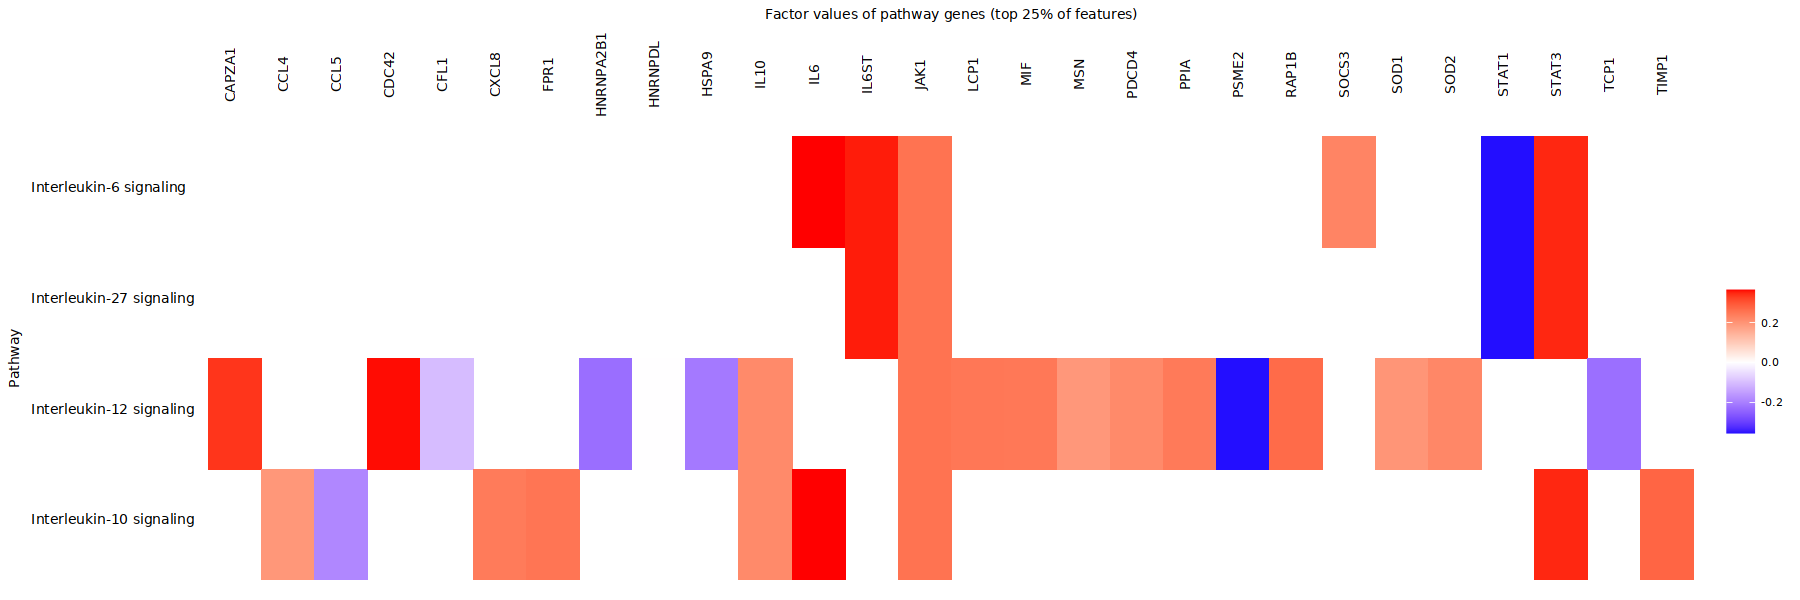

In [392]:
options(repr.plot.width=15, repr.plot.height=5)
g1 = ggplot(pathways_vis_genes_summarized, aes(SYMBOL,  name, fill= factor_value)) + 
    plot_config_heatmap + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)  + 
    scale_x_discrete(position = "top") +
    theme(axis.text.x = element_text(angle = 90), axis.title.x = element_blank()) +
    xlabel +
    ylabel +
    ggtitle(paste0('Factor values of pathway genes (top ', select_thres  * 2 *100, '% of features)'))
    #facet_grid(.~ variable, space = 'free' , scales = 'free')# + scale_x_discrete(position = "top")   
g1

In [393]:
### Visualization - Part 1: visualize the exact factor values of the genes for each view/ dimension

In [394]:
# Specific Text Descriptions:
xlabel = xlab('Gene') 
ylabel = ylab('View')

In [395]:
head(pathways_vis_genes,2)

,SYMBOL,variable,pathway,pvalue,view_text,enrichment,name,amount_na,total_amount,coverage,cluster,type,variable_name,view,factor_value,factor_value_direction
,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
358,CAPZA1,Factor2,R-HSA-9020591,0.0005759461,complete_complete,positive,Interleukin-12 signaling,15,47,0.6808511,6,X4_MonocytesCD14,X4_Monocytes...CD14__CAPZA1,CD14(high) Monocytes (Cluster 4),0.4327551,positive
359,CAPZA1,Factor2,R-HSA-9020591,0.0005759461,complete_complete,positive,Interleukin-12 signaling,15,47,0.6808511,6,X7_MonocytesCD14,X7_Monocytes...CD14__CAPZA1,CD14(high) Monocytes (Cluster 7),0.2862161,positive


In [396]:
plot_data_cluster = unique(pathways_vis_genes[,c('SYMBOL', 'variable', 'type','view',  'variable_name', 'factor_value', 'factor_value_direction')])

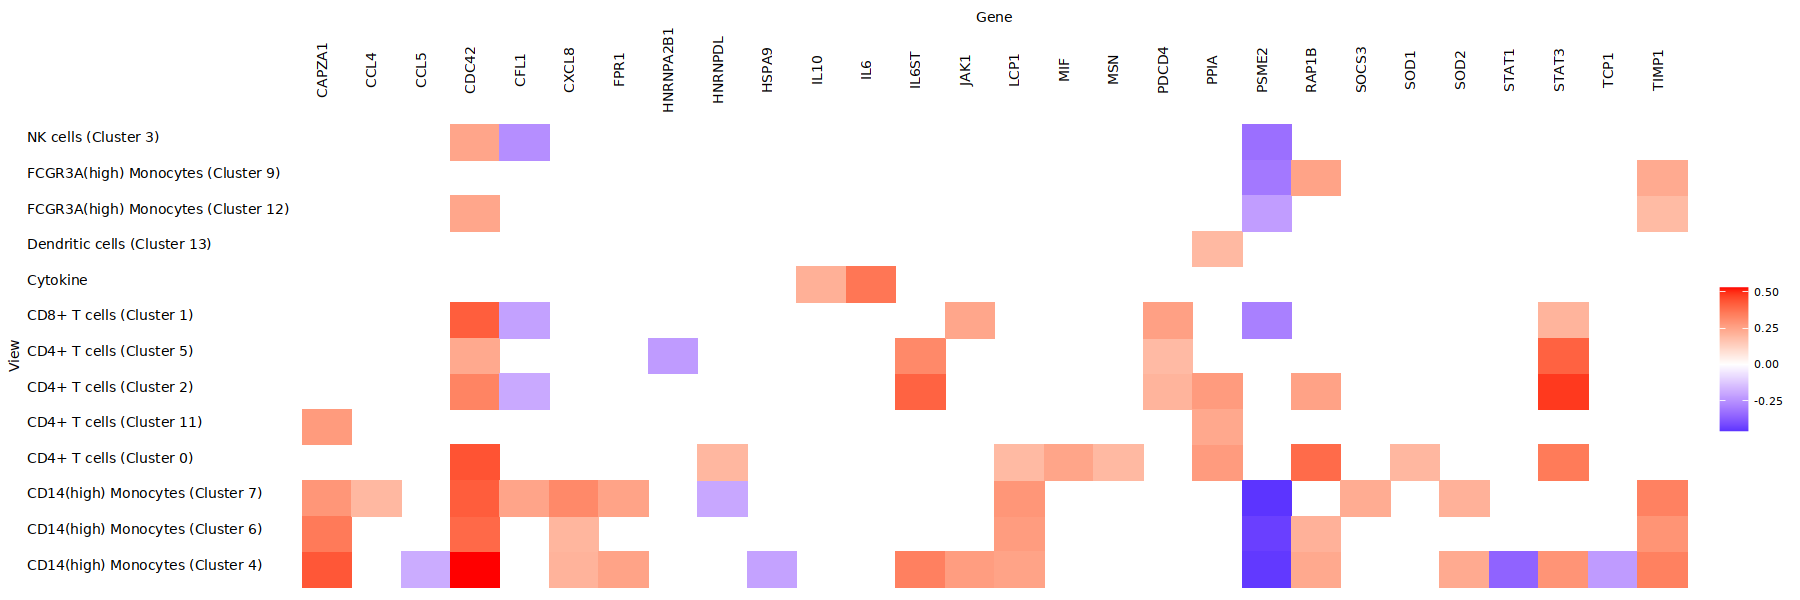

In [397]:
options(repr.plot.width=15, repr.plot.height=5)
g2 = ggplot(plot_data_cluster, aes(SYMBOL,  view, fill= factor_value)) + 
    plot_config_heatmap + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)  + 
    scale_x_discrete(position = "top") +
    theme(axis.text.x = element_text(angle = 90)) +
    xlabel +
    ylabel
    #facet_grid(.~ variable, space = 'free' , scales = 'free')# + scale_x_discrete(position = "top")   
g2

In [398]:
### Combine the two plots

In [399]:
figure_name = "FIG7_E6_Top_Pathways_Genes"

In [400]:
# Sizes of the plot
width_par = 8.07
height_par = 3.5

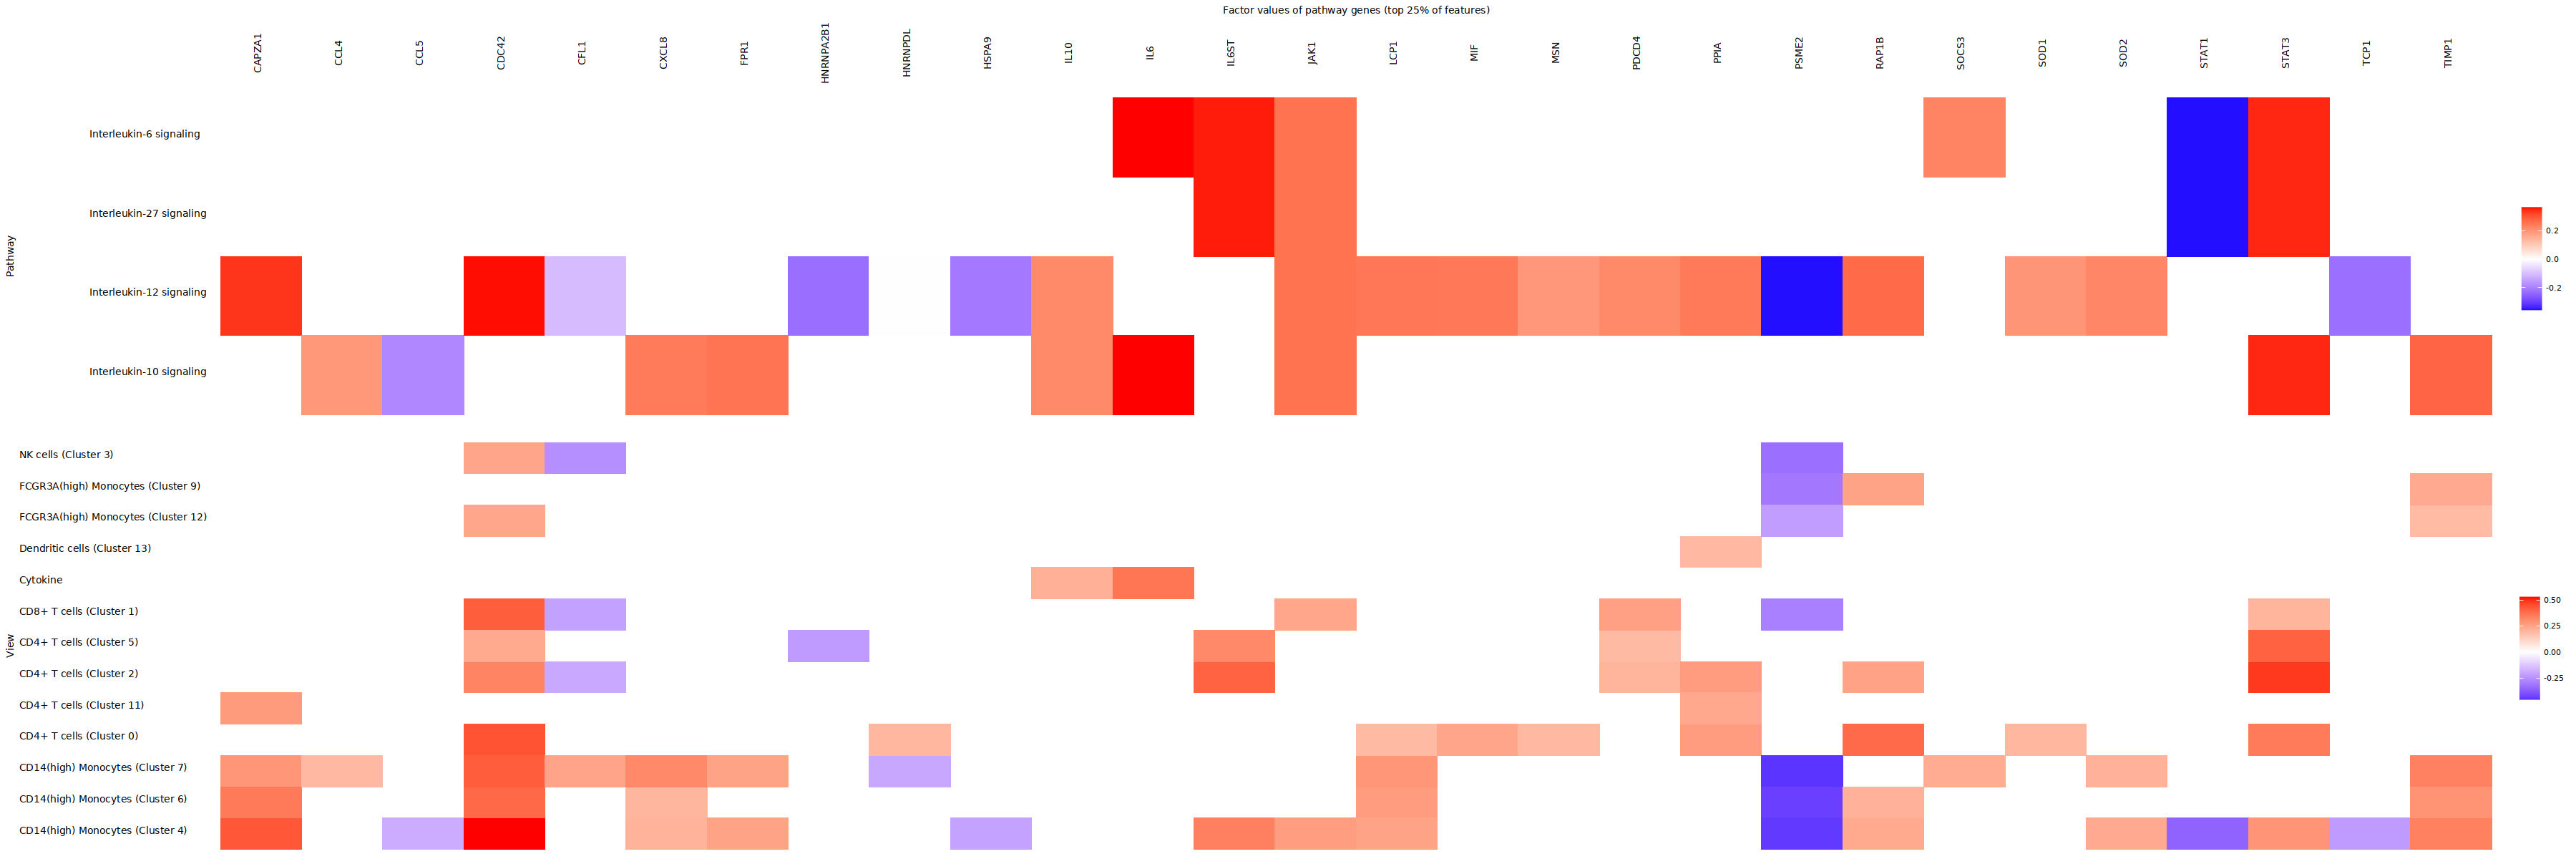

In [401]:
options(repr.plot.width=30, repr.plot.height=10)
combined_enriched_pathways = ggarrange(g1,
          g2 + theme(axis.text.x = element_blank(), axis.title.x =element_blank()), align = 'v', ncol = 1)
combined_enriched_pathways

In [402]:
pdf(paste0('figures/Final_Figures/', figure_name, '.pdf'), width =width_par, height =height_par)
print(combined_enriched_pathways)
dev.off()

png 
  2